----
----
----
----
# 0 METADATA
* Espacio de analisis de Outliers
----
----
----
----

### 1. Descripción del DataFrame: Puestos de Trabajo y Salarios de Data en el Mundo

El DataFrame proporciona datos relacionados con puestos de trabajo y salarios en el ámbito de la ciencia de datos a nivel mundial, con un predominio particular en los Estados Unidos (EEUU). Este conjunto de datos es interesante para comprender la dinámica laboral y salarial en el campo de la ciencia de datos en diferentes regiones geográficas, con un enfoque especial en la economía de los Estados Unidos.

### 2. Características del DataFrame:

El DataFrame tiene las siguientes características:

- **Número de Filas y Columnas:** El DataFrame consta de 9355 filas y 12 columnas.
  
- **Tipos de Datos:** Las columnas contienen una combinación de tipos de datos. Se destacan 2 columnas de tipo entero (`int64`) y 9 columnas de tipo objeto (`object`), lo que indica la presencia de datos numéricos y de texto.

- **Valores Nulos:** No hay valores nulos presentes en ninguna de las columnas del DataFrame, lo que garantiza la integridad y la completitud de los datos.

### 3. Detalles de las Columnas:

A continuación se describen las columnas del DataFrame:

1. **work_year:** Esta columna registra el año de trabajo asociado con cada puesto de trabajo.

2. **job_title:** Contiene el título del puesto de trabajo ocupado por cada individuo.

3. **job_category:** Describe la categoría o campo específico del trabajo dentro del ámbito de la ciencia de datos.

4. **salary_currency:** Indica la moneda en la que se registra el salario para cada puesto de trabajo.

5. **salary:** Representa el salario asociado con cada puesto de trabajo, expresado en la moneda original.

6. **salary_in_usd:** Proporciona el salario convertido a dólares estadounidenses para facilitar la comparación y el análisis uniforme.

7. **employee_residence:** Registra la residencia del empleado, lo que puede proporcionar información sobre la movilidad laboral y la distribución geográfica de los puestos de trabajo.

8. **experience_level:** Indica el nivel de experiencia del empleado asociado con cada puesto de trabajo.

9. **employment_type:** Describe el tipo de empleo, ya sea a tiempo completo, a tiempo parcial, temporal, etc.

10. **work_setting:** Detalla la configuración laboral, como trabajo remoto, oficina tradicional, trabajo independiente, etc.

11. **company_location:** Registra la ubicación geográfica de la empresa que ofrece el puesto de trabajo.

12. **company_size:** Indica el tamaño de la empresa, lo que puede influir en la cultura laboral, las oportunidades de crecimiento y otros aspectos relacionados con el empleo.

### 4. Variable Objetivo (Target):

* La variable objetivo es *salary_in_usd*, que representa el salario convertido a dólares estadounidenses. 
* La intención es crear un modelo de regresión para determinar el salario en función de diversas características, como el país, el título del puesto, la categoría del trabajo y otros factores relevantes. * Este modelo de regresión será útil para predecir y entender cómo diferentes variables afectan al salario en el campo de la ciencia de datos.





----
----
----
----
# 1 IMPORTACION DE LIBRERIAS
----
----
----
----

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

----
----
----
----
# 2 DATAFRAME
----
----
----
----

In [6]:
df = pd.read_csv(r"G:\Mi unidad\1 DS\1 Archivos py\5 CURSOS\05 CodesHouse DS 1\datas\jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


----
----
----
----
# 3 EXPLORACION Y LIMPIEZA DE DATOS
----
----
----
----

----
## 3.1 EXPLORACION DE LOS DATOS
----

In [7]:
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.76,0.52,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.98,63608.84,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.50,63177.37,15000.0,105700.0,143000.0,186723.0,450000.0


In [10]:
df.isnull().mean()*100

work_year             0.0
job_title             0.0
job_category          0.0
salary_currency       0.0
salary                0.0
salary_in_usd         0.0
employee_residence    0.0
experience_level      0.0
employment_type       0.0
work_setting          0.0
company_location      0.0
company_size          0.0
dtype: float64

----
## 3.2 LIMPIEZA DE LOS DATOS
----

In [68]:
duplicados = df[df.duplicated()]
duplicados

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
64,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Entry-level,Full-time,In-person,United States,M
111,2023,Research Scientist,Data Science and Research,USD,165000,165000,United States,Mid-level,Full-time,Remote,United States,M
112,2023,Research Scientist,Data Science and Research,USD,118800,118800,United States,Mid-level,Full-time,Remote,United States,M
115,2023,Data Engineer,Data Engineering,USD,184000,184000,United States,Mid-level,Full-time,In-person,United States,M
116,2023,Data Engineer,Data Engineering,USD,123000,123000,United States,Mid-level,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9079,2022,Data Scientist,Data Science and Research,USD,78000,78000,United States,Mid-level,Full-time,Remote,United States,M
9080,2022,Data Engineer,Data Engineering,USD,135000,135000,United States,Senior,Full-time,Remote,United States,M
9081,2022,Data Engineer,Data Engineering,USD,115000,115000,United States,Senior,Full-time,Remote,United States,M
9214,2021,Data Engineer,Data Engineering,USD,200000,200000,United States,Mid-level,Full-time,Remote,United States,L


In [69]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


##### Porque elimino los duplicados:
* Asi evito distorsionar el análisis y generar resultados incorrectos o sesgados.
* Para mejorar Eficiencia computacional: Reduciendo el tamaño de tu conjunto de datos.
* Interpretación más clara y evitar reduncancia.
* Facilitar el modelado de datos.

In [13]:
df_sin_duplicados=df_sin_duplicados.drop(df_sin_duplicados[["salary","salary_currency"]],axis=1)

In [70]:
df_sin_duplicados

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [72]:
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)
df_sin_duplicados

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
5337,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
5338,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
5339,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


### 1º CONCLUSION

1. Eliminacion de duplicados
    * El conjunto de datos original consta de 9355 filas y 12 columnas.
        * Después de eliminar los duplicados, el nuevo DataFrame (df_sin_duplicados) tiene 5341 filas y 12 columnas.
        * Se ha eliminado la información duplicada, lo que puede ayudar a garantizar la integridad de los análisis y modelos posteriores.

2. Transformación de Datos:
    * La columna work_year indica que los datos abarcan un período de tiempo desde el año 2020 hasta el 2023, con la mayoría de los registros concentrados en el año 2023.
    * La columna salary_in_usd muestra que los salarios, convertidos a dólares estadounidenses, varían desde $15,000 hasta $450,000, con una media de alrededor de $150,299.50 y una desviación estándar de aproximadamente $63,177.37.
    * Por lo que tenemos una amplia desviación estandar y esto podría perjudicar al modelo. 
        * Mas adelante seria interesante normalizar los datos.


3. Eliminación de columnas no relevantes
    * La columna salary y salary_currency se han eliminado del DataFrame df_sin_duplicados, ya que parece que la información de salario en dólares estadounidenses (salary_in_usd) es suficiente para nuestro análisis.


----
----
----
----
# 4 ANALISIS DE VARIABLES UNIVARIADO
----
----
----
----


----
## 4.1 ANALISIS DE VARIABLES UNIVARIADO DE CATEGORICAS
----

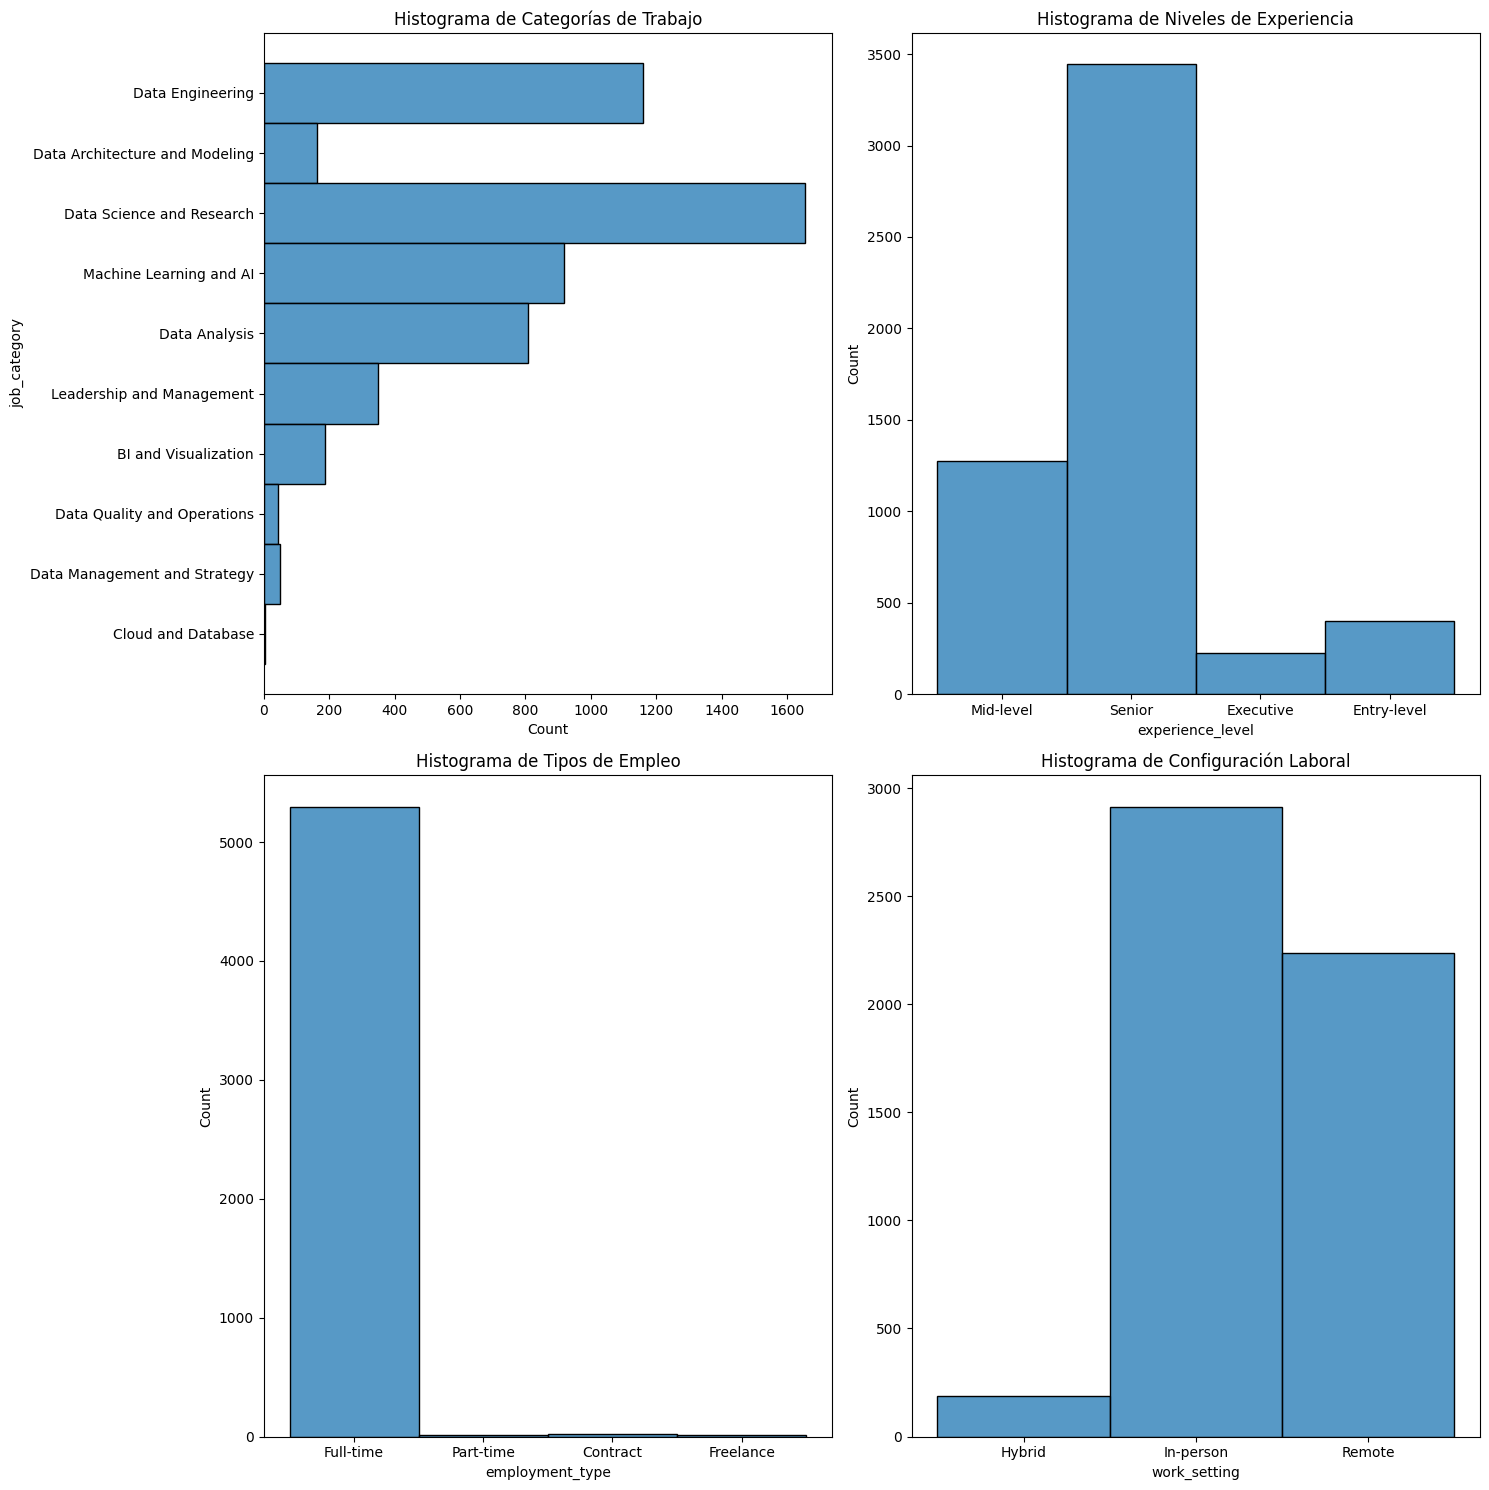

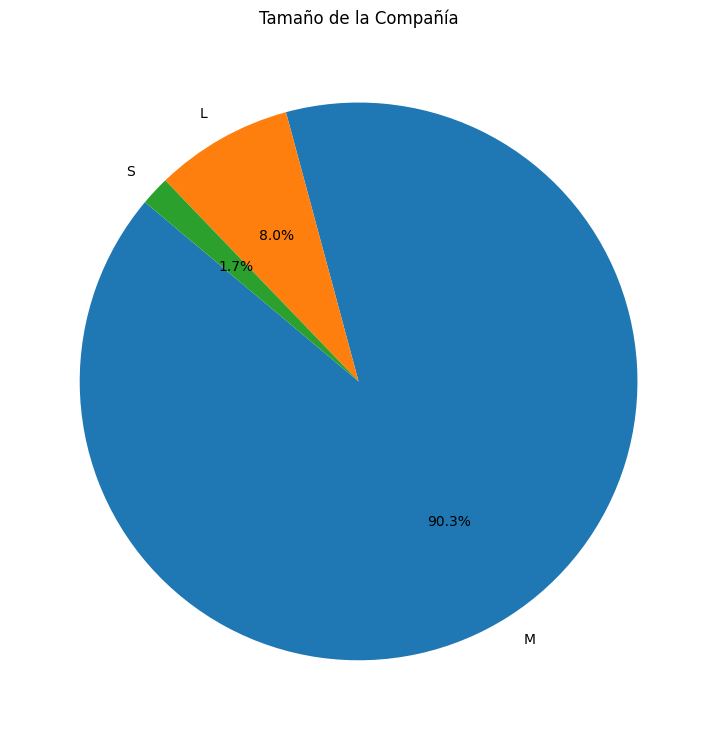

In [16]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(ax =axis [0,0], data = df_sin_duplicados, y="job_category")
axis[0, 0].set_title("Histograma de Categorías de Trabajo")
sns.histplot(ax =axis [0,1], data = df_sin_duplicados, x = "experience_level")
axis[0, 1].set_title("Histograma de Niveles de Experiencia")
sns.histplot(ax = axis [1,0], data = df_sin_duplicados, x ="employment_type")
axis[1, 0].set_title("Histograma de Tipos de Empleo")
sns.histplot(ax =axis [1,1], data = df_sin_duplicados, x="work_setting" )
axis[1, 1].set_title("Histograma de Configuración Laboral")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7.5, 7.5))
size =df["company_size"].value_counts()
plt.title("Tamaño de la Compañía")
plt.pie(size,labels=size.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.show()

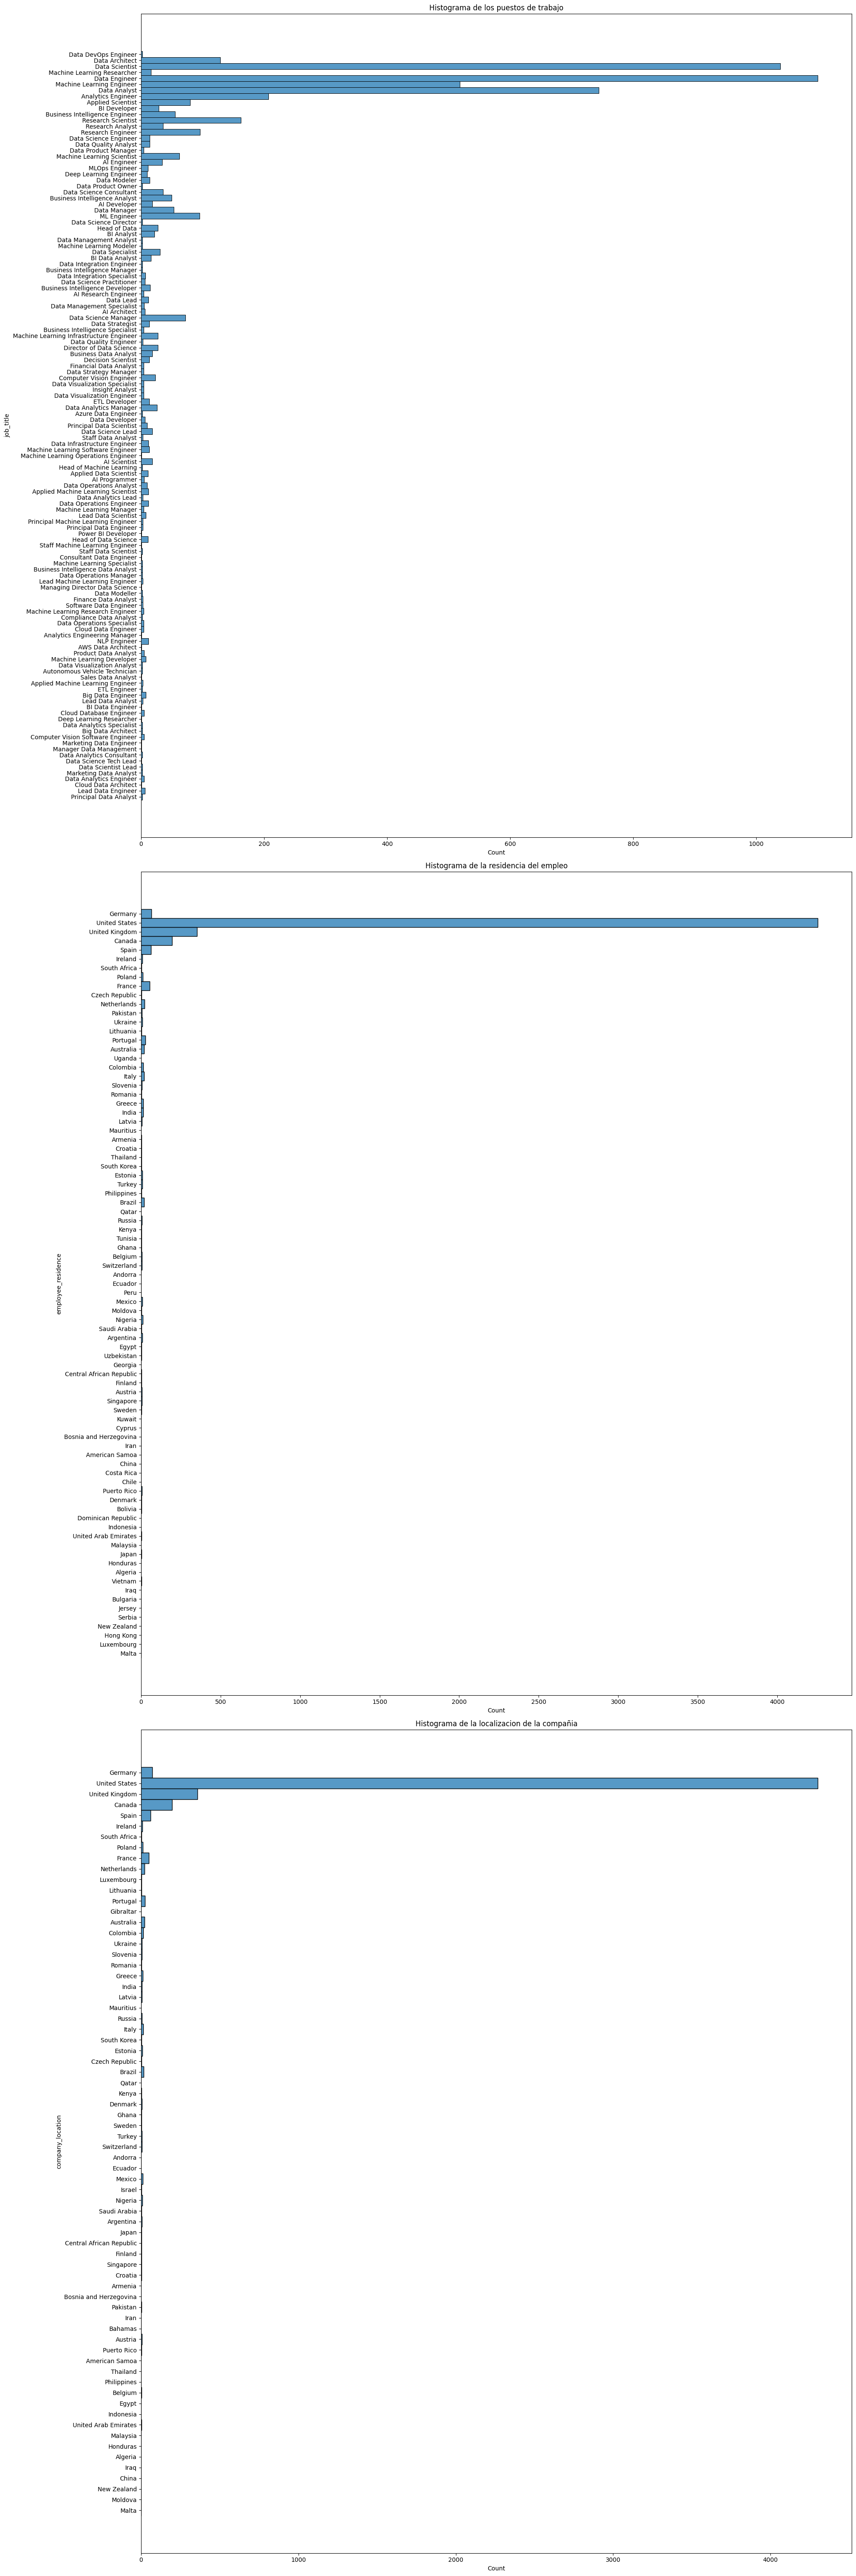

In [17]:
fig, axis = plt.subplots(3, 1, figsize=(20, 60))
sns.histplot(ax = axis [0], data = df_sin_duplicados, y ="job_title")
axis[0].set_title ("Histograma de los puestos de trabajo")
sns.histplot(ax =axis [1], data = df_sin_duplicados, y ="employee_residence")
axis[1].set_title ("Histograma de la residencia del empleo")
sns.histplot(ax =axis [2], data = df_sin_duplicados, y = "company_location")
axis[2].set_title ("Histograma de la localizacion de la compañia")
plt.tight_layout()
plt.show()

# Job tittle 
#employer residdence
#company location



In [18]:
unicosjob = df_sin_duplicados["job_title"].value_counts().head(125)
unicosjob

job_title
Data Engineer                    1100
Data Scientist                   1039
Data Analyst                      744
Machine Learning Engineer         518
Analytics Engineer                207
                                 ... 
Deep Learning Researcher            1
Analytics Engineering Manager       1
BI Data Engineer                    1
Power BI Developer                  1
Marketing Data Engineer             1
Name: count, Length: 125, dtype: int64

In [19]:
unicosempleo = df_sin_duplicados["employee_residence"].value_counts().head(125)
unicosempleo


employee_residence
United States     4255
United Kingdom     351
Canada             196
Germany             65
Spain               63
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: count, Length: 83, dtype: int64

In [20]:
unicositio = df_sin_duplicados["company_location"].value_counts().head(125)
unicosempleo



employee_residence
United States     4255
United Kingdom     351
Canada             196
Germany             65
Spain               63
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: count, Length: 83, dtype: int64

----
## 4.2 ANALISIS DE VARIABLES UNIVARIADO DE NUMERICAS
----

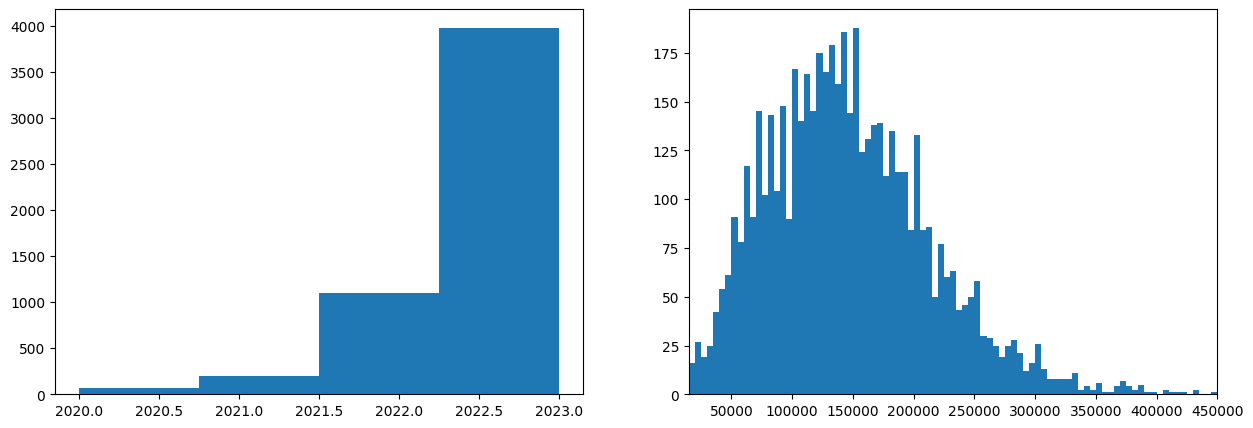

In [21]:
anio = df_sin_duplicados["work_year"]
dinero =df_sin_duplicados["salary_in_usd"]
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].hist(anio,bins = 4)
axis[1].hist(dinero, bins = range(int(min(dinero)), int(max(dinero)) + 5000, 5000))
axis[1].set_xlim(min(dinero), max(dinero))
plt.show()


In [22]:
unicositio1 = df_sin_duplicados["salary_in_usd"].value_counts().head(5000)
unicositio1


salary_in_usd
100000    85
150000    81
120000    73
200000    64
160000    63
          ..
258384     1
134326     1
173800     1
304200     1
412000     1
Name: count, Length: 1786, dtype: int64

### 2º CONCLUSION
---
**1. Primeras conclusiones sobre los datos:**
   1. **CATEGORICAS:**
      1. **Categoría del Trabajo (job_category)**
         * La mayoría de los puestos de trabajo se encuentran en el campo de la ciencia de datos, seguidos por ingeniería de datos y aprendizaje automático e inteligencia artificial. Los analistas de datos también representan una parte significativa, pero menor, de los puestos de trabajo.
         
      2. **Nivel de Experiencia (experience_level)**
         * Predomina el nivel senior en los puestos de trabajo, seguido de un tercio del tamaño de senior en midlevel. Esto sugiere que la mayoría de las oportunidades laborales están destinadas a profesionales con experiencia, lo que podría dificultar el acceso al mercado para aquellos que son nuevos en la industria.

      3. **Tipo de Empleo (employment_type)**
         * La mayoría de los puestos de trabajo son de tiempo completo (full-time), lo que indica que la demanda principal es para roles que requieren dedicación a tiempo completo.

      4.**Configuración Laboral (work_setting)**
         * La opción más común es el trabajo presencial (in-person work setting), seguido de cerca por el trabajo remoto (remote). Sin embargo, se observa que los trabajos con configuración híbrida son menos comunes, representando una pequeña fracción del total de puestos de trabajo. Además, los trabajos con configuración híbrida parecen tener una menor prevalencia en comparación con las otras opciones, ya que representan menos del 10% del total de puestos de trabajo.

      5. **Demanda de roles en el campo de datos(job_title)**
         * La cantidad de posiciones en Data Engineering es la más alta, seguida de Data Scientist y luego Data Analyst. Esto sugiere una alta demanda de habilidades en la ingeniería de datos, seguida de habilidades en ciencia de datos y análisis de datos.
         **Puestos emergentes**: Se observa la emergencia de roles "pseudo" en el campo de datos, como Machine Learning Engineer y Data Architect, que aunque no son tan numerosos como los roles principales, reflejan una tendencia hacia la especialización dentro del ámbito de la ciencia de datos y la ingeniería de datos.

      6. **Localización de empleados y empresas(company_location)**
         * La mayoría de los empleados y empresas están ubicados en los Estados Unidos, seguido por el Reino Unido y Canadá. Esto puede sugerir áreas geográficas donde la industria de datos está más desarrollada o tiene una mayor demanda.

      7. **Distribución internacional (employe residence)**
         * Aunque los Estados Unidos lideran en términos de cantidad de empleados y empresas en el campo de datos, hay presencia en varios otros países, lo que indica que la industria de datos es global y no se limita a unas pocas ubicaciones.

      8. **Clara predominancia de empresas medianas("company_size")**
          * puede proporcionar una visión útil del mercado laboral en el campo de la ciencia de datos, es importante considerar las posibles limitaciones y sesgos asociados con esta distribución al interpretar los resultados del análisis.

   2. **NUMERICAS:**
      9. **Distribución de Salarios (salary_in_usd)**
         * Los datos muestran una amplia variedad de salarios en el campo de la ciencia de datos, con concentraciones comunes en rangos como $100,000, $150,000 y $120,000. Sin embargo, también se observan salarios menos frecuentes pero significativamente más altos, como $200,000 o más. Esta variación refleja la diversidad de roles y la demanda de habilidades en la industria.

      10. **Creciendo por miles (work_year)**
         * Se observa un claro crecimiento anual en porcentajes vertiginosos, mostrando una clara necesidad de estos puestos y de la revolucion tecnologica.
         * Practicamente de 2022 a 2023 se ha multiplicado los puestos un aproximadamente 300%. 
---
**2. Porque se usan diversas graficas y dos librerias:**
   En el análisis proporcionado, se utilizan las bibliotecas `seaborn` y `matplotlib` para visualizar diferentes aspectos de los datos:

   1. **Gráficos de Seaborn:**
      - Se utilizan gráficos de histograma con `sns.histplot` para visualizar la distribución de variables categóricas, como la categoría del trabajo (`job_category`), el nivel de experiencia (`experience_level`), el tipo de empleo (`employment_type`) y la configuración laboral (`work_setting`). Se establecen títulos adecuados para cada gráfico para una mejor comprensión de los datos.
   
   2. **Gráficos de Matplotlib:**
      - Se utiliza un gráfico de pastel con `plt.pie` para visualizar la distribución del tamaño de la empresa (`company_size`). 

   3. **Gráficos de Seaborn para Variables Categóricas Adicionales:**
      - Se emplean nuevamente gráficos de histograma con `sns.histplot` para visualizar la distribución de otras variables categóricas, como el título del trabajo (`job_title`), la residencia del empleado (`employee_residence`) y la ubicación de la compañía (`company_location`). Estos gráficos se presentan por separado debido a la cantidad de valores categóricos y para mejorar la legibilidad y comprensión de los datos.

   4. **Gráficos de Matplotlib para Variables Numéricas:**
      - Se utilizan histogramas con `plt.hist` para visualizar la distribución de variables numéricas, como el año de trabajo (`work_year`) y el salario en dólares estadounidenses (`salary_in_usd`). Se ajusta el ancho de los intervalos de los bins para una mejor visualización de la distribución de los datos.
---
**3. CONCLUSIONES TEORICAS:**
* Tras un análisis exhaustivo de los datos de empleo en el campo de la ciencia de datos, se observa una clara tendencia hacia roles altamente especializados. La mayoría de las oportunidades laborales se concentran en áreas clave como ciencia de datos, ingeniería de datos y aprendizaje automático, lo que refleja la creciente demanda de profesionales con habilidades avanzadas en análisis y gestión de datos. Además, se destaca la importancia de roles senior en el mercado laboral, indicando que la mayoría de las oportunidades están dirigidas a profesionales con experiencia previa, lo que podría suponer un desafío para aquellos que buscan ingresar a la industria.

* Por otro lado, la prevalencia de empleos a tiempo completo sugiere que el campo de la ciencia de datos requiere un compromiso completo por parte de los empleados, reflejando la naturaleza exigente y dinámica de los roles en esta área. Aunque el trabajo presencial es común, también se observa una aceptación creciente del trabajo remoto, lo que refleja las tendencias globales hacia la flexibilidad laboral. Sin embargo, la adopción de configuraciones de trabajo híbridas aún no es generalizada, lo que sugiere áreas de oportunidad para la evolución de las prácticas laborales en el campo de la ciencia de datos.

* La target(salary_in_usd): 
   * Los datos muestran una amplia variación en los salarios. 
   * Se observa que hay una amplia gama de salarios representados, desde valores bajos hasta montos significativamente más altos.
   * Por ejemplo, los salarios más comunes parecen estar en el rango de $100,000 a $200,000, con frecuencias relativamente altas para esos valores específicos. Sin embargo, también se observan casos menos frecuentes pero notablemente altos, como salarios de $300,000 o más.

   * Esta variación tan pronunciada en los datos de salario puede atribuirse a múltiples factores:
      * la naturaleza diversa de los roles en el campo de la ciencia de datos, la diferencia en la experiencia y habilidades de los profesionales
      * las disparidades en los costos de vida y las economías de los países de origen.
      * otros factores: el nivel de educación, la ubicación geográfica y el tipo de industria también pueden influir en la variabilidad de los salarios.

   * Se refleja la complejidad y la dinámica del mercado laboral. Los empleadores pueden ofrecer una amplia variedad de compensaciones para atraer y retener talento, lo que resulta en una diversidad de salarios representados en los datos.

---
**3. CONCLUSIONES DE LOS DATOS**
   1. Los outliers en el conjunto de datos de salarios podrían representar casos excepcionales de compensación que están muy por encima o por debajo de la norma. Estos valores extremos pueden surgir debido a bonificaciones excepcionalmente altas, compensaciones anómalas para roles especializados o errores en los datos. Identificar y gestionar estos outliers es importante, ya que pueden distorsionar la interpretación de la distribución salarial y afectar negativamente la precisión de los modelos analíticos.

   2. En cuanto a la acumulación de puestos de trabajo, podría ser beneficioso considerar la reducción de la dimensionalidad del conjunto de datos. Dado que hay una gran cantidad de categorías de trabajo que podrían tener un impacto limitado en el modelo debido a su baja frecuencia, sería útil agrupar o combinar estas categorías menos comunes en grupos más amplios o eliminar aquellas que tienen una presencia mínima. Esto simplificaría el modelo y reduciría el riesgo de sobreajuste, permitiendo una interpretación más clara de las tendencias y relaciones entre las variables.

   3. Reducir la dimensionalidad del lugar de la compañía en el conjunto de datos puede ser una estrategia valiosa para simplificar el modelo y mejorar su interpretación. Se agrupa de forma silimar a puestos de trabajo

----
## 4.3 RESTRUCTURACION DE LOS DATOS / AGRUPACION
----
-Se procede a agrupar en apartado: "Otros" tanto los puestos de trabajo con numero muy bajo, empleo y localización.

In [23]:
df_sin_duplicados.value_counts()

work_year  job_title                      job_category               salary_in_usd  employee_residence  experience_level  employment_type  work_setting  company_location  company_size
2020       AI Scientist                   Machine Learning and AI    45896          Denmark             Entry-level       Full-time        Hybrid        Denmark           S               1
2023       Data Science Manager           Data Science and Research  272400         United States       Executive         Full-time        In-person     United States     L               1
                                                                     255000         United States       Senior            Full-time        In-person     United States     M               1
                                                                     245100         United States       Senior            Full-time        In-person     United States     M               1
                                                            

In [24]:
# Aqui podemos ver que los puestos de trabajo que mas se repiten.
# Metemos en otros, todos aquellos menores a 50
cuantos= df_sin_duplicados["job_title"].value_counts().head(15)
cuantos

job_title
Data Engineer                     1100
Data Scientist                    1039
Data Analyst                       744
Machine Learning Engineer          518
Analytics Engineer                 207
Research Scientist                 162
Data Architect                     129
Research Engineer                   96
ML Engineer                         95
Applied Scientist                   80
Data Science Manager                72
Machine Learning Scientist          62
Business Intelligence Engineer      55
Data Manager                        53
Business Intelligence Analyst       50
Name: count, dtype: int64

In [25]:
# Renombrar las categorías menos comunes como "otros" en el caso de job
otros_categorias_job = cuantos.index.tolist()
df_sin_duplicados.loc[~df_sin_duplicados["job_title"].isin(otros_categorias_job), "job_title"] = "Others"

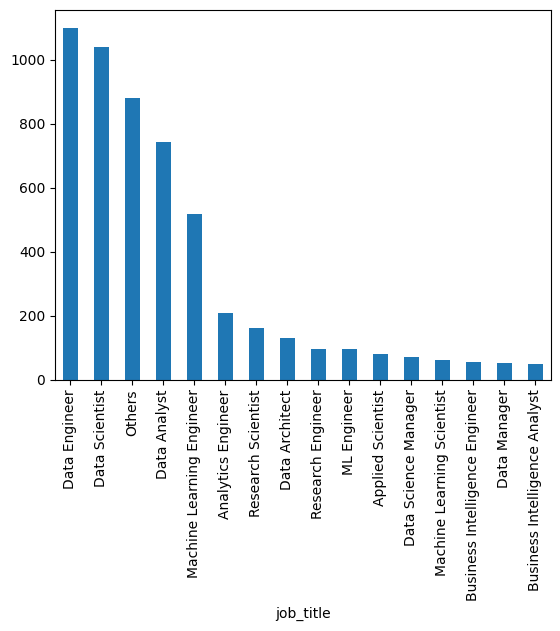

In [26]:
df_sin_duplicados["job_title"].value_counts().plot(kind='bar')
plt.show()

In [27]:
#Nos quedamos con todas las que sean superiores a 50
residencias= df_sin_duplicados["employee_residence"].value_counts().head(7)
residencias

employee_residence
United States     4255
United Kingdom     351
Canada             196
Germany             65
Spain               63
France              53
Portugal            26
Name: count, dtype: int64

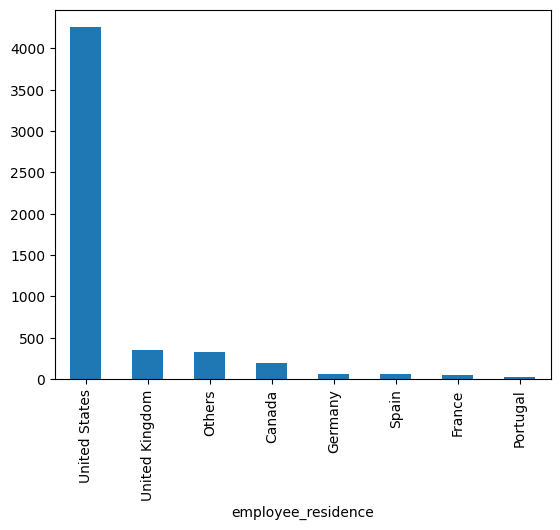

In [28]:

otros_categorias_residencias = residencias.index.tolist()
df_sin_duplicados.loc[~df_sin_duplicados["employee_residence"].isin(otros_categorias_residencias), "employee_residence"] = "Others"
df_sin_duplicados["employee_residence"].value_counts().plot(kind='bar')
plt.show()

In [29]:
loc= df_sin_duplicados["company_location"].value_counts().head(7)
loc
#Dejamos Francia que practicamente es 50

company_location
United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
France              49
Portugal            24
Name: count, dtype: int64

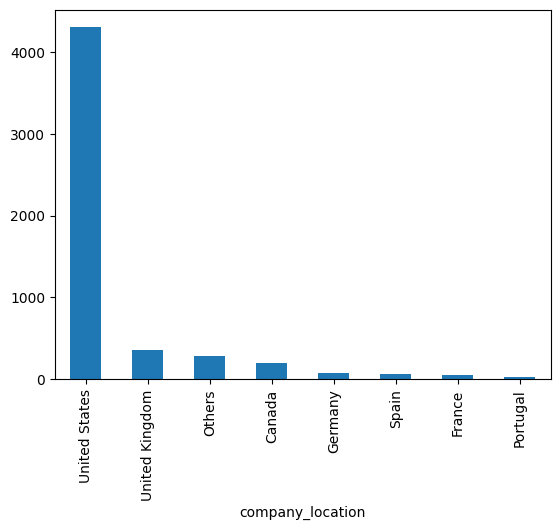

In [30]:
otros_categorias_loc = loc.index.tolist()
df_sin_duplicados.loc[~df_sin_duplicados["company_location"].isin(otros_categorias_loc), "company_location"] = "Others"
df_sin_duplicados["company_location"].value_counts().plot(kind='bar')
plt.show()

### A tener en cuenta:
-Tras el analisis de las variables, el titulo del trabajo realmente puede ser confuso a la hora de la determinación del propio modelo.
-Existiendo la columna job_category, podemos determinar de forma mas sencilla la categoria del trabajo, ya que el propio titulo a veces puede ser erroneo acorde a la función a realizar, por ende, se procede a la eliminación de dicha columna. 

(No se eliminó antes para mostrar posibles soluciones de columna en caso de alta dimensionalidad de los datos.)

In [31]:
dfd = df_sin_duplicados
dfd.drop(columns=["job_title"], inplace= True)
dfd

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...
5336,2021,Data Management and Strategy,165000,United States,Senior,Full-time,Remote,United States,L
5337,2020,Data Science and Research,412000,United States,Senior,Full-time,Remote,United States,L
5338,2021,Data Science and Research,151000,United States,Mid-level,Full-time,Remote,United States,L
5339,2020,Data Science and Research,105000,United States,Entry-level,Full-time,Remote,United States,S


In [32]:
#Observamos como queda nuestro DF.
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_category        5341 non-null   object
 2   salary_in_usd       5341 non-null   int64 
 3   employee_residence  5341 non-null   object
 4   experience_level    5341 non-null   object
 5   employment_type     5341 non-null   object
 6   work_setting        5341 non-null   object
 7   company_location    5341 non-null   object
 8   company_size        5341 non-null   object
dtypes: int64(2), object(7)
memory usage: 375.7+ KB


----
----
----
----
# 5 Analisis multivariable
----
----
----
----

----
## 5.1 Numerico - Numerico
----

<Axes: >

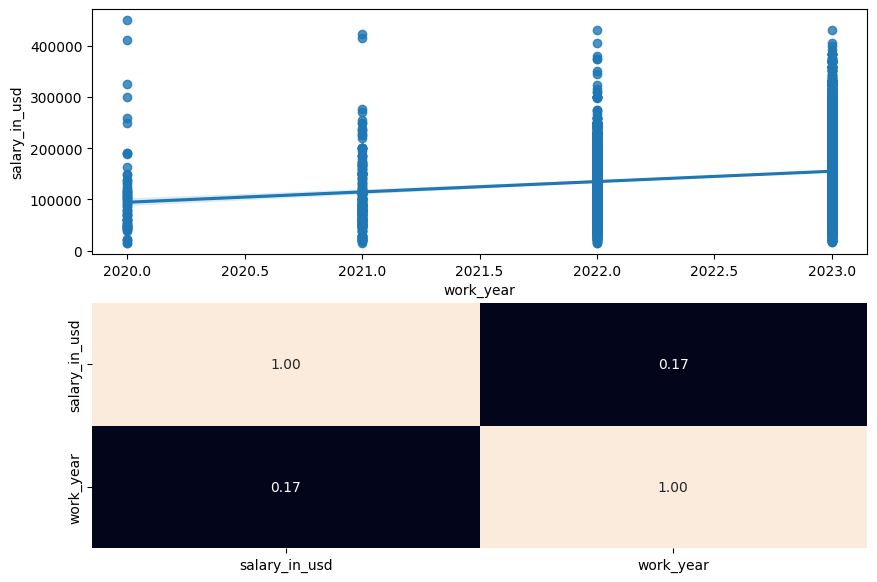

In [33]:

fig, axis = plt.subplots(2, 1, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "work_year", y = "salary_in_usd")
sns.heatmap(df[["salary_in_usd", "work_year"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

#### Conclusion:
-Relación lineal leve y ascendente en positivo
-Aparentemente conforme evoluciona el año, aumenta los salarios (y los puestos de trabajo)

----
## 5.2 Categorica - Target
----

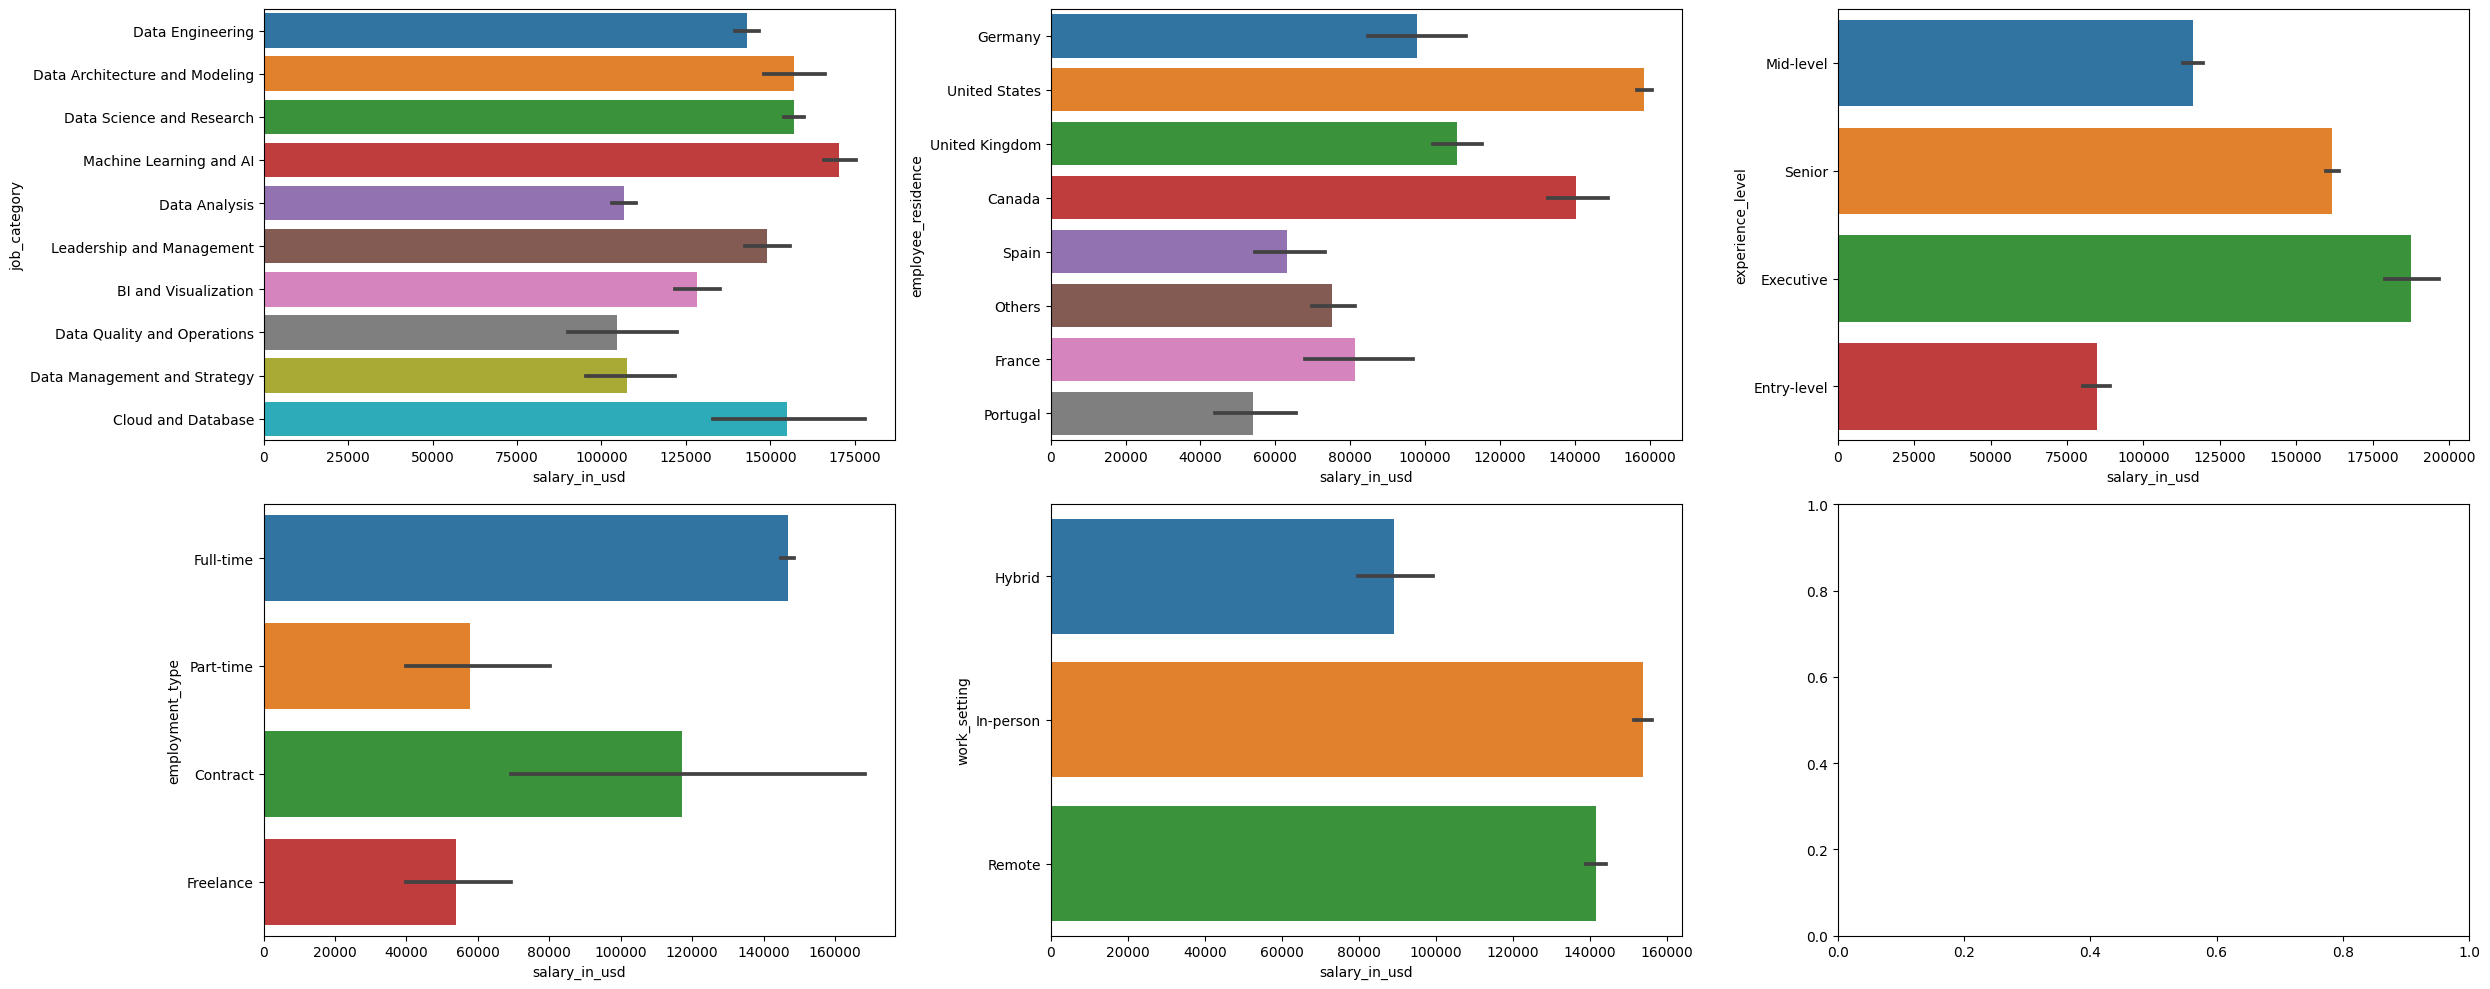

In [34]:
#Observemos los valorres media de los salarios dependiendo de las categoricas
fig, axis = plt.subplots(2, 3, figsize = (25, 10))


sns.barplot(ax=axis[0, 0], data=dfd, x="salary_in_usd", y="job_category")
sns.barplot(ax=axis[0, 1], data=dfd, x="salary_in_usd", y="employee_residence")
sns.barplot(ax=axis[0, 2], data=dfd, x="salary_in_usd", y="experience_level")
sns.barplot(ax=axis[1, 0], data=dfd, x="salary_in_usd", y="employment_type")
sns.barplot(ax=axis[1, 1], data=dfd, x="salary_in_usd", y="work_setting")

plt.tight_layout()

plt.show()

### Todas estas conclusiones son referentes a: Salario vs categoricas
#### Por ende, son conclusiones basadas en la media 
    1. Job_Category:
        1. Posición predominante: 
            * Machine Learning and AI:
            * Bajo nivel de Outliers
            * Sueldo medio aproximado(sin outliers):: 160.000 
        2. Posición menos predominante: 
            * Data Quality and Operations
            * Alto nivel de Outliers
            * Sueldo medio aproxiamdo (sin outliers):100.000 
        3. Posiciones altas cercanas a la predominante:
            * Cloud And DataBase
            * Alto nivel de Outliers, sueldo medio aproximado: 150.000
            * Data Science and Reserach: Bajo nivel de Outliers, sueldo medio aproximado:  150.000
            * Data Architecture and Modeling: Nivel medio de Outliers: sueldo medio aproximado:  150.000
        4. Grafico de bigotes:
            * En los puestos de salarios mas 
        4. Conclusión:
            * Aquellas possiciones mas especializadas tienen sueldos mas altos, sobretodo las enfocadas a IA y Base de Datos

    2. Employee_residence:
        1. Posición predominante: 
            * EEUU
            * Bajo nivel de Outliers
            * Salarios mas altos, medio aproximado: 160.000
        2. Posición menos predominante:
            * Portugal
            * Nivel medio de Outliers
            * Salarios bajos, medio aproximado: 55.000
        3. Posiciones altas cercanas a la predominante:
            * Canada
            * medio nivel de Outliers
            * Salarios altos, medio aproximado: 140.000
        4. Conclusion:
            * Norteamerica paga mejor los puestos Data y Cloud
            * Europa paga acorde al nivel del salario de pais (Predominando paises ricos como alemania y Francia, descenciendo en España y Portugal)
        
    3. Experience_level:
      1. Posición predominante: 
            * Executive
            * Alto nivel de Outliers
            * Salarios mas altos, medio aproximado (sin outliers): 180.000
        2. Posición menos predominante:
            * Entry level
            * Nivel medio de Outliers
            * Salarios bajos, medio aproximado(sin outliers): 80.000
        3. Posiciones cercanas a la predominante: 
            * Senior seguido de Mid-level
        4. Conclusion:
            * Se observa normalidad en los salarios acorde al nivel de experiencia
    
    4. Employment_type
          1. Posición predominante: 
            * Fulltime
            *  Muy Bajo nivel de Outliers
            * Salarios mas altos, medio aproximado (sin outliers): 145.000
        2. Posición menos predominante:
            * Freelance
            * Nivel medio de Outliers
            * Salarios bajos, medio aproximado(sin outliers): 55.000
        3. Posiciones cercanas a la predominante: 
            * Contract (temporales/ proyectos concretos)
            * Nivel MUY ALTO de outliers
            * Salarios medios, medio aproximado(sin outliers): 115.000
        4. Conclusion:
            * Se observa una clara disposición al fulltime (parece que el compromiso en la empresa se paga)
            * Destacar gran nivel de Outliers en Contract: Seguramente porque al ser contratados para cosas concretas implica perfiles demasiado concretos y por tanto, pueden ser mas caros.
            * Freelance y Part-time tienen sueldos parecidos
                * Puede que el hecho de que los Freelance al tener menor compromiso empresarial y por tanto, se beneficie a los fulltime que son mas "comprometidos" y de ahí los salarios.

    5. Work-setting
          1. Posición predominante: 
            * In-person
            * Bajo nivel Outliers
            * Salarios mas altos, medio aproximado (sin outliers): 155.000
        2. Posición menos predominante:
            * Hybrid
            * Nivel medio de Outliers
            * Salarios bajos, medio aproximado(sin outliers): 90.000
        3. Posiciones cercanas a la predominante: 
            * Remote 
            * Bajo nivel Outliers
            * Salarios medios, medio aproximado(sin outliers): 140.000
        4. Conclusion:
            * El hecho de no poder determinar donde se encontrará el trabajador en determinados momentos,(si en oficina o si en remoto), perjudica gravemente al salario.
            * El remote aunque gane algo menos, tambien tiene menos gastos: gasolina de desplazamiento, tiempo... por lo que es mas rentable a nivel economico.

----
## 5.3  Grafico de bigotes con scatterplot
----

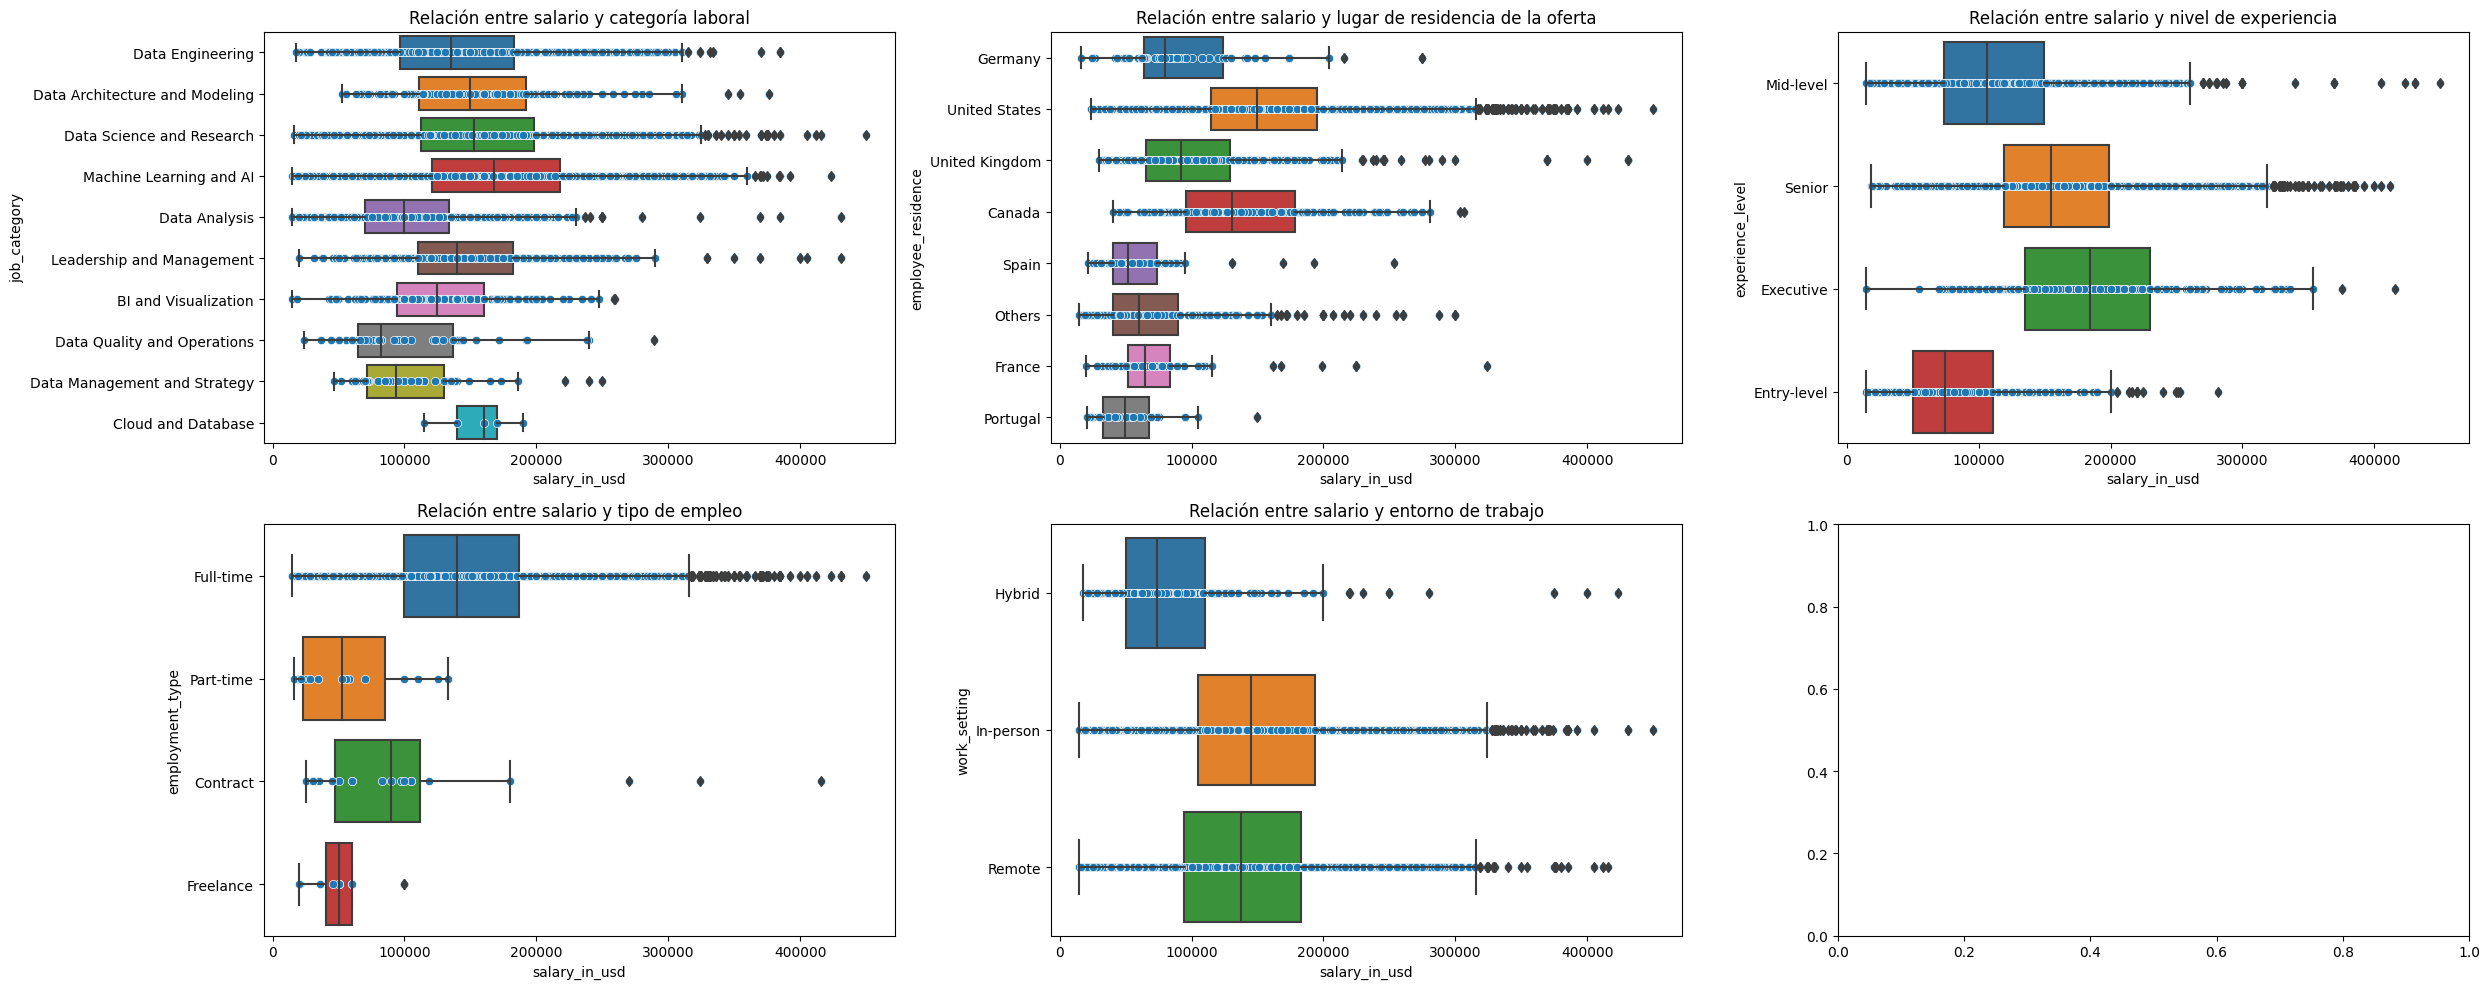

In [35]:
fig, axis = plt.subplots(2, 3, figsize=(25, 10))

# Trazar el gráfico de dispersión con bigotes para la primera subgráfica
sns.boxplot(ax=axis[0, 0], data=dfd, x="salary_in_usd", y="job_category")
sns.scatterplot(ax=axis[0, 0], data=dfd, x="salary_in_usd", y="job_category")
axis[0, 0].set_title("Relación entre salario y categoría laboral")

# Trazar los gráficos de dispersión con bigotes para las otras subgráficas
sns.boxplot(ax=axis[0, 1], data=dfd, x="salary_in_usd", y="employee_residence")
sns.scatterplot(ax=axis[0, 1], data=dfd, x="salary_in_usd", y="employee_residence")
axis[0, 1].set_title("Relación entre salario y lugar de residencia de la oferta")

sns.boxplot(ax=axis[0, 2], data=dfd, x="salary_in_usd", y="experience_level")
sns.scatterplot(ax=axis[0, 2], data=dfd, x="salary_in_usd", y="experience_level")
axis[0, 2].set_title("Relación entre salario y nivel de experiencia")

sns.boxplot(ax=axis[1, 0], data=dfd, x="salary_in_usd", y="employment_type")
sns.scatterplot(ax=axis[1, 0], data=dfd, x="salary_in_usd", y="employment_type")
axis[1, 0].set_title("Relación entre salario y tipo de empleo")

sns.boxplot(ax=axis[1, 1], data=dfd, x="salary_in_usd", y="work_setting")
sns.scatterplot(ax=axis[1, 1], data=dfd, x="salary_in_usd", y="work_setting")
axis[1, 1].set_title("Relación entre salario y entorno de trabajo")



plt.tight_layout()

plt.show()


### Todas estas conclusiones son referentes a: Salario vs categoricas

#### En este caso atendiendo a Grafico de bigotes y scatterplot

    1. Job_Category:
        1. Media predominante:
            * Machine Learning and AI
        2. Salario mas alto:
            * Data Science and Reserarch: aproximado 450.000
        2. Outliers
            * Toman mayor distancia del bigote upper, cuanto menos nivel de expecialización requiere
            * Destacar gran acumulación de outliers en Data Science and Research (los cuales se encuentran muy concentrados, pero no muy alejados del upper)
            * No existen Outliers en el lado izquierdo de la grafica
        3. Distribución de los datos:
            * Tendencia media: Por regla general tienden a una media tendente a la izquierda (asimétrica negativa)
            * Destacar: Tendencia mas normal: BI and Visualizatión
            * A mayor nº de datos la media tiende mas al centro (aunque de forma leve) manteniendo la logica estadistica
            * Destacar la tendencia hacia la derecha de la media de Cloud and Database (por carencia de nº alto de valores)
        4. Conclusión gráfica:
            * Aquellas possiciones mas especializadas tienen sueldos mas altos, por tanto mayor salario y mayor nº de outlierrs
            * Cola a lado derecho: Los outliers estan mas alejadas de la media en puestos de valor menor expecialización
            * Gran nº ded valores bajos (que empujan la media)
            * Moda tiende a lado izquierdo
            * Cola a lado derecho
        5. Conclusion: 
            * Si quieres ganar mas de inicio, estudia Cloud and Database (conclusión fundamentada en ausencia de datos) porque el salario es mucho mas alto
                * Pero por nº de datos, tambien ganan mas al inicio los Data architecture
            * Cualquier trabajo relacionado con Dato y ML/DP o Engineering, esta mejor pagado que los nos especializados (o solo analistas de datos)
    
    2. Employee_residence:
        1. Media predominante:
            * EEUU
        2. Salario mas alto:
            *  EEUU: aproximado 450.000 (coincidente con Data Science)
        2. Outliers
            * Numero muy alto en EEUU con una gran cola (seguramente haya gran competencia de profesionales)
            * Cola mas grande: UK: Pese haber una clara tendencia a la izquierda sus Outliers son claramente los que mayor distancia toman de la media
                * Ocurre similar con Spain y France
            * No existen Outliers en el lado izquierdo de la grafica
        3. Distribución de los datos:
            * Tendencia media: Por regla general tienden a una media tendente a la izquierda (asimétrica negativa)
            * Destacar: Tendencia mas normal: Canada (con solo 2 Outliers)+
                * Lugar donde los salarios pareces estan mejor distribudios y su escalado es mas normalizado
            * A mayor nº de datos la media tiende mas al centro (aunque de forma leve) manteniendo la logica estadisticaç
                * Aunque en el Caso de EEUU a razón del nº de outliers, gran tendencia hacia la derecha por el peso de Outliers.
            * Destacar la tendencia hacia la derecha de la media de Cloud and Database (por carencia de nº alto de valores)
        4. Conclusión grafica:
            * Donde mas puestos de trabajo existe, hay mayor numero de Outliers en precio (pero mas concentrados)
            * Cola a lado derecho: En los paises donde tenemos menos datos, los outliers estan mas dispersos y alejados de la media (logico)
            * Gran nº de valores bajos (que empujan la media a la izquierda)
            * Moda tiende a lado izquierdo
            * Cola a lado derech
        5. Conclusion:
            * Norteamerica tiene los sueldos mas altos (tambien la vida es mas cara)
            * Si puedes elegir donde empezar a trabajar: Canada (los salarios minimos son mas altos, y mas estables)
            * Si quieres ganar mas: EEUU
            * En europa los datos se reparten atendiendo a la riqueza del pais (predomina alemania), sin embargo, en Europa el mejor pais para iniciarte es España y portugal (Pero no para progresar)

    3. Experience_level:
        1. Media predominante:
            * Executive
        2. Salario mas alto:
            * Un Mid Level (coincidente con Data Science)
        2. Outliers
            * Numero muy alto en Senior con una cola concentrada.
            * Cola mas grande: Mid-Level
        3. Distribución de los datos:
            * Tendencia media: Por regla general tienden a una media tendente a la izquierda (asimétrica negativa)
            * Destacar: Tendencia a grafica simetrica en Executive con solo 2 outliers.
            * Los valores de inicio son muy muy parecidos (destacando un Excecutive que gana lo que un Entry level)
                * Seguramente sea un part-time o un contract
        4. Conclusión gráfica:
            * Mayor simetrria en los puestos altos
            * Mayor asimetria negativa en puestos bajos
            * Mayor dispersión y cola en puestos bajos
            * Aun con gran cola Senior, son demasiados outliers, por lo que reflejan claramente una tendencia hacia el incremento salarial.
            * Destaca que un Midlevel sea el que mas cobre. (EEUU y D.Science) podría ser un error
        5. Conclusion:
            * Donde mas falta precisión en los salarios en el caso de MIdlevel, por ende, quiere decir que a mayor sea el puesto de trabajo, mas seguro será un salario alto atendiendo a la concentración de outliers
            * Sorprende que existan entry_level con salarios mas altos que ka nedua de Senior y executive (Se observan como excepcionales, pero son un numero considerable)

    4. Employment_type
        1. Media predominante:
            * Fulltime
        2. Salario mas alto:
            * Fulltime
        3. Distribución de los datos:
            * Fulltime: tendencia asimetrica negativa (destacar gran concentración Outliers)
            * Partime: nº bajo de puestos
                * tendencia asimetrica negativa leve y sin outliers
            * Contract: asimetrica negativa con gran cola de outliers pero bajo numero de estos
            * Freelance: Pocos puestos, sin bigote upper y solo 1 outliers, por lo que tendencia asimetrica positiva.
        4. Conclusion grafica:
            * Destacar practicamente Fulltime (donde gran nº de outliers indica clara tendencia a incremento de los salarios)
            * El resto de posiciones son menos precisas por carencia de datos.
        5. Conclusion:
            * Si quieres ganar dinero... fulltime.

    5. Work-setting
        1. Media predominante:
            * In person
        2. Salario mas alto:
            * In person
        3. Distribución de los datos:
            * Tendencia asimetrica negativa
            * In-person:  (destacar gran concentración Outliers)
            * Cola mas larga: Hybrid
            * En in-persona y remote: los percentiles entre 25/50/75 tienden a simetria
        4. Conclusion grafica:
            * Destacar practicamente In person (donde gran nº de outliers indica clara tendencia a incremento de los salarios)
            * Remote: 
        5. Conclusion:
            * En este caso In-person genera mayor benenficio en cuanto al nº de datos
            * Gran disparidad de datos en los outliers ded Hybrid, con clara tendencia a salariso mas bajos (salvo fortuna de ser un outlier)
            * Remotte: Datos pareciddos a In-person, con distribución similar. 
    
    * Si tienes que ser alguien en este dataset:
        * (No es la moda ni la media:)
        * Un mid-level Data Science que trabaja en EEUU con un salario de aproximadamente 450.000, fulltime y in person.

----
## 5.4 Analisis Multivariante
----
* Para ello debemos "pasar a numerica nuestras categoricas"

In [36]:
# Factorización (proceso mediante el cual transformamos en numerica las categoricas)

dfd["jobn"] = pd.factorize(dfd["job_category"])[0]
dfd["residencen"] = pd.factorize(dfd["employee_residence"])[0]
dfd["experiencen"] = pd.factorize(dfd["experience_level"])[0]
dfd["typen"] = pd.factorize(dfd["employment_type"])[0]
dfd["settingn"] = pd.factorize(dfd["work_setting"])[0]
dfd["locationn"] = pd.factorize(dfd["company_location"])[0]
dfd["sizen"] = pd.factorize(dfd["company_size"])[0]

In [37]:
#Matriz de correlación
matrix = dfd[["work_year","jobn", "residencen", "experiencen", "typen", "settingn", "locationn", "sizen", "salary_in_usd"]].corr()
matrix


,work_year,jobn,residencen,experiencen,typen,settingn,locationn,sizen,salary_in_usd
work_year,1.000000,0.068508,-0.222213,-0.044895,-0.109239,-0.019038,-0.182919,0.158370,0.178031
jobn,0.068508,1.000000,-0.011256,0.026156,0.016762,0.004374,-0.017856,0.007042,-0.104892
residencen,-0.222213,-0.011256,1.000000,0.017436,0.151578,-0.015421,0.917875,-0.033213,-0.352828
experiencen,-0.044895,0.026156,0.017436,1.000000,0.026272,-0.014070,-0.003266,-0.037847,-0.006841
typen,-0.109239,0.016762,0.151578,0.026272,1.000000,0.008971,0.092823,0.056277,-0.082031
settingn,-0.019038,0.004374,-0.015421,-0.014070,0.008971,1.000000,-0.047383,0.066143,0.000669
locationn,-0.182919,-0.017856,0.917875,-0.003266,0.092823,-0.047383,1.000000,-0.063066,-0.328698
sizen,0.158370,0.007042,-0.033213,-0.037847,0.056277,0.066143,-0.063066,1.000000,0.011352
salary_in_usd,0.178031,-0.104892,-0.352828,-0.006841,-0.082031,0.000669,-0.328698,0.011352,1.000000


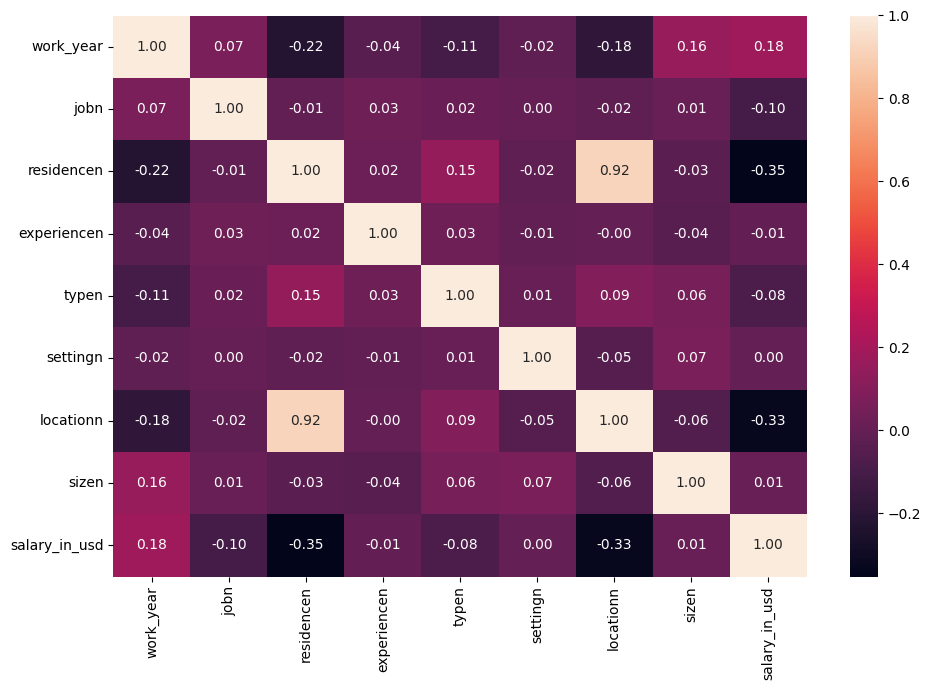

In [38]:
# Mas visual
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(dfd[["work_year","jobn", "residencen", "experiencen", "typen", "settingn", "locationn", "sizen", "salary_in_usd"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Conclusion:

1. Residencen (país de la oferta) y Salary_in_usd (salario del trabajo): La correlación negativa:
    * indica que existe una relación inversa moderada entre el país donde se ofrece el trabajo y el salario en dólares. 
    * Esto sugiere que, en general, los trabajos ofrecidos en ciertos países tienden a tener salarios más bajos en dólares en comparación con otros países.
    * Por ejemplo, si el valor de residencen aumenta (lo que significa que se está considerando un país diferente), es probable que el salario en dólares disminuya.
    * Esto se asemeja a lo visto en los graficos.

2. Locationn (lugar de residencia de la empresa) y Salary_in_usd (salario del trabajo): 
    * La correlación negativa de -0.33 entre locationn y salary_in_usd indica que hay una relación inversa moderada
    * Esto sugiere que, en general, las empresas ubicadas en ciertas áreas tienden a ofrecer salarios más bajos en dólares en comparación con otras áreas.

3. Colinealidad:
    * Existe una asociación fuerte y positiva entre el país donde se oferta el trabajo y la ubicación de la empresa (0.92)
    * Teniendo en cuenta la alta colinealidadd, y lo que interesa realmente en este caso es el lugar del puesto de trabajo (debido a que In person es la caracteristica dominante de work_setting)
    * Podemos eliminar la variable company_location y dejamos residencia de empleo (employee_residence)

4. work_year: 
    * 0.16 de correlación, por tanto, se observa un leve aumento continuo de, conforme pasa el año, sube el salario.
    
5. Salary_in_usd y las otras variables: 
    * En general, las correlaciones entre Salary_in_usd y las otras variables son relativamente bajas.
    * Estas variables no tienen una influencia lineal fuerte en el salario en dólares.

In [39]:
# Eliminamos las columnas que generan multicolinealidad
dfd.drop(columns=["company_location", "locationn"], inplace=True)
dfd

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size,jobn,residencen,experiencen,typen,settingn,sizen
0,2023,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,L,0,0,0,0,0,0
1,2023,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M,1,1,1,0,1,1
2,2023,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M,1,1,1,0,1,1
3,2023,Data Science and Research,212000,United States,Senior,Full-time,In-person,M,2,1,1,0,1,1
4,2023,Data Science and Research,93300,United States,Senior,Full-time,In-person,M,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,2021,Data Management and Strategy,165000,United States,Senior,Full-time,Remote,L,8,1,1,0,2,0
5337,2020,Data Science and Research,412000,United States,Senior,Full-time,Remote,L,2,1,1,0,2,0
5338,2021,Data Science and Research,151000,United States,Mid-level,Full-time,Remote,L,2,1,0,0,2,0
5339,2020,Data Science and Research,105000,United States,Entry-level,Full-time,Remote,S,2,1,3,0,2,2


In [40]:
selected_columns = ["jobn", "residencen", "experiencen", "typen", "settingn","work_year","salary_in_usd","sizen"]
new_df = dfd[selected_columns].copy()
new_df

,jobn,residencen,experiencen,typen,settingn,work_year,salary_in_usd,sizen
0,0,0,0,0,0,2023,95012,0
1,1,1,1,0,1,2023,186000,1
2,1,1,1,0,1,2023,81800,1
3,2,1,1,0,1,2023,212000,1
4,2,1,1,0,1,2023,93300,1
...,...,...,...,...,...,...,...,...
5336,8,1,1,0,2,2021,165000,0
5337,2,1,1,0,2,2020,412000,0
5338,2,1,0,0,2,2021,151000,0
5339,2,1,3,0,2,2020,105000,2


In [41]:
dfd.drop(columns=["company_size", "jobn", "residencen", "experiencen", "typen", "settingn", "sizen"], inplace=True)
dfd

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting
0,2023,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid
1,2023,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person
2,2023,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person
3,2023,Data Science and Research,212000,United States,Senior,Full-time,In-person
4,2023,Data Science and Research,93300,United States,Senior,Full-time,In-person
...,...,...,...,...,...,...,...
5336,2021,Data Management and Strategy,165000,United States,Senior,Full-time,Remote
5337,2020,Data Science and Research,412000,United States,Senior,Full-time,Remote
5338,2021,Data Science and Research,151000,United States,Mid-level,Full-time,Remote
5339,2020,Data Science and Research,105000,United States,Entry-level,Full-time,Remote


----
----
----
----
# PASO 6: INGENIERIA DE CARACTERISTICAS
----
----
----
----

----
#### 6.1 Análisis de outliers
----
* Problemas
    1. Los outliers son de nuestra target
    2. El resto de variables son categoricas o numericas (factorizadas), por lo que carecen de outliers.
        * work_year	pese a ser numerica es temporal por lo que carece de outliers.

In [42]:

price_stats = dfd["salary_in_usd"].describe()

price_iqr = price_stats["75%"] - price_stats["25%"]

upper_limit = min(price_stats["75%"] + 1.5 * price_iqr, dfd["salary_in_usd"].max())
lower_limit = max(price_stats["25%"] - 1.5 * price_iqr, dfd["salary_in_usd"].min())

print(f"Los límites superior e inferior para la búsqueda de outliers son de máximo: {round(upper_limit, 2)} y mínimo: {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

outliers = dfd[(dfd["salary_in_usd"] < lower_limit) | (dfd["salary_in_usd"] > upper_limit)]
df_ourliers = pd.DataFrame(outliers)

Los límites superior e inferior para la búsqueda de outliers son de máximo: 317241.0 y mínimo: 15000, con un rango intercuartílico de 87494.0


In [43]:
print(f"Valores atípicos:\n ---------------------------\n {outliers} ")


Valores atípicos:
 ---------------------------
       work_year               job_category  salary_in_usd employee_residence  \
237        2023    Machine Learning and AI         319000      United States   
360        2023    Machine Learning and AI         331640      United States   
432        2023    Machine Learning and AI         336300      United States   
449        2023  Data Science and Research         323300      United States   
495        2023    Machine Learning and AI         324000      United States   
...         ...                        ...            ...                ...   
5145       2020  Data Science and Research         450000      United States   
5274       2021  Data Science and Research         416000      United States   
5291       2020  Data Science and Research         325000      United States   
5334       2021    Machine Learning and AI         423000      United States   
5337       2020  Data Science and Research         412000      United St

In [44]:
# Los Outliers en este caso son muy importantes, vamos a analizarlos.
df_ourliers

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting
237,2023,Machine Learning and AI,319000,United States,Senior,Full-time,Remote
360,2023,Machine Learning and AI,331640,United States,Senior,Full-time,In-person
432,2023,Machine Learning and AI,336300,United States,Senior,Full-time,In-person
449,2023,Data Science and Research,323300,United States,Senior,Full-time,In-person
495,2023,Machine Learning and AI,324000,United States,Senior,Full-time,In-person
...,...,...,...,...,...,...,...
5145,2020,Data Science and Research,450000,United States,Mid-level,Full-time,In-person
5274,2021,Data Science and Research,416000,United States,Executive,Contract,Remote
5291,2020,Data Science and Research,325000,United States,Executive,Full-time,Remote
5334,2021,Machine Learning and AI,423000,United States,Mid-level,Full-time,Hybrid


In [45]:
# Atendiendo a la logica de nuestros podriamos pensar que los outliers mas reales son aquellos que solo son 1 unidad o muy pocas unidades.
df_ourliers[["employee_residence","experience_level"]].value_counts()

employee_residence  experience_level
United States       Senior              55
                    Executive           11
United Kingdom      Mid-level            5
United States       Mid-level            4
France              Senior               1
United Kingdom      Senior               1
Name: count, dtype: int64

In [46]:
maxi=df_ourliers["salary_in_usd"].idxmax()
maxi

5145

In [47]:
indexloco = df_ourliers.loc[5145]
# ESTE CASO ES CURIOSISIMO! EL PUERTO QUE MAS COBRA DE TODO EEUU ES UN MID LEVEL
indexloco

work_year                                  2020
job_category          Data Science and Research
salary_in_usd                            450000
employee_residence                United States
experience_level                      Mid-level
employment_type                       Full-time
work_setting                          In-person
Name: 5145, dtype: object

In [48]:
"dfd.drop(index=5145,inplace=True)"

'dfd.drop(index=5145,inplace=True)'

In [49]:
mid = df_ourliers[df_ourliers["experience_level"]== "Mid-level"]
a_mean =mid.index
a_mean

Index([1137, 1256, 1393, 1399, 3286, 3646, 4180, 5145, 5334], dtype='int64')

In [50]:
indices = [1137, 1256, 1393, 1399, 3286, 3646, 4180, 5145, 5334]
dfd.loc[indices, "salary_in_usd"] = 317241


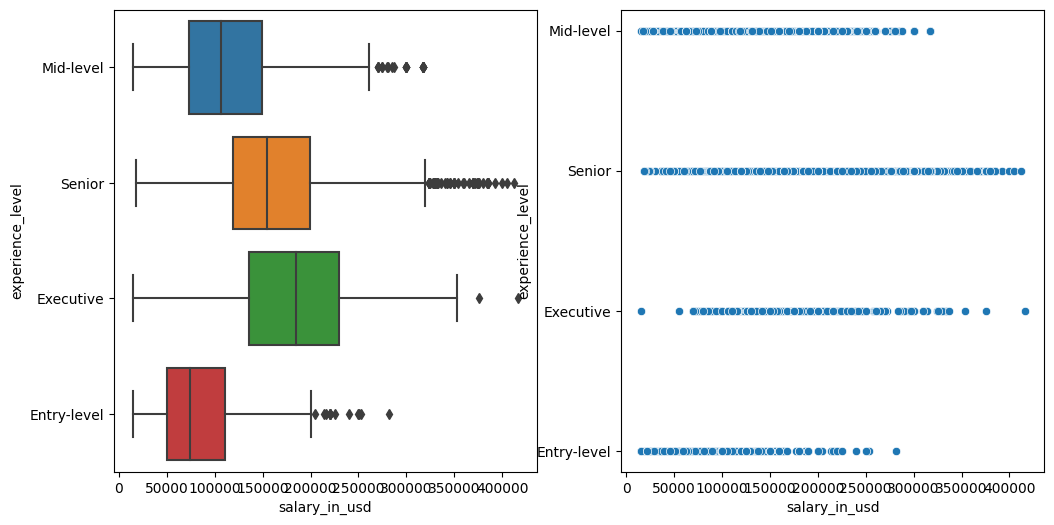

In [51]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axis[0], data=dfd, x="salary_in_usd", y="experience_level")
sns.scatterplot(ax=axis[1], data=dfd, x="salary_in_usd", y="experience_level")
plt.show()

### Decisión
* Podria medianizar los Outliers de Mid-Level porque aun pudiendo ser reales, no representan a la mayoria real, pero se decide poner el valor maximo del rango intercuartilico + 1.5 para darle la oportunidad de que si son puestos realmente complejos, tengan un salario alto pero no desproporcionado.
* Se modifican en el DFD (El df que se utilizará para entrenar el modelo)

----
## 6.2 Análisis de valores faltantes
----

In [52]:
dfd.isnull().sum()

work_year             0
job_category          0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
dtype: int64

### No hay valores nulos

----
## 6.2 Inferencia de nuevas caracteristicas
----

#### Conclusión
* No parece interesante crear nuevas caracteristicas en si (No interresa unir o dividir el DF, los datos son claros )

----
----
----
----
# PASO 7: ESCALADO DE VALORES
----
----
----
----

In [53]:
"""

# Suponiendo que df es tu DataFrame
columns_to_factorize = dfd.columns.difference(['work_year', 'salary_in_usd'])

# Factorizar las columnas excepto "work_year" y "salary_in_usd"
dfd[columns_to_factorize] = dfd[columns_to_factorize].apply(lambda x: pd.factorize(x)[0])

# Verificar el resultado
new_df = dfd
new_df.head()"""

'\n\n# Suponiendo que df es tu DataFrame\ncolumns_to_factorize = dfd.columns.difference([\'work_year\', \'salary_in_usd\'])\n\n# Factorizar las columnas excepto "work_year" y "salary_in_usd"\ndfd[columns_to_factorize] = dfd[columns_to_factorize].apply(lambda x: pd.factorize(x)[0])\n\n# Verificar el resultado\nnew_df = dfd\nnew_df.head()'

In [54]:

numeric_columns = new_df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

new_df[numeric_columns] = scaler.fit_transform(new_df[numeric_columns])

new_df.head()


,jobn,residencen,experiencen,typen,settingn,work_year,salary_in_usd,sizen
0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.183936,0.0
1,0.111111,0.142857,0.333333,0.0,0.5,1.0,0.393103,0.5
2,0.111111,0.142857,0.333333,0.0,0.5,1.0,0.153563,0.5
3,0.222222,0.142857,0.333333,0.0,0.5,1.0,0.452874,0.5
4,0.222222,0.142857,0.333333,0.0,0.5,1.0,0.180000,0.5


#### PRUEBA:
* Se realiza arbol de decisión con dfd:
    * Se retocan outliers
    * Se factoriza
    * Se le aplica un minmax escaler
    * Ressultado 0.17 aproximado
    * Tras hiperparametros:0.15 aproximado
 
 
* Se comprueba a realizar arbol con df_new (el factorizado)
    * No se tocan los outliers: 0.01538965631875708
    * Con hiperparametros: 0.0143483279682753


#### CONCLUSION:
- Se decide entrenar el modelo con df_new

----
----
----
----
# PASO 8: DIVISION DE MI CONJUNTO DE DATOS
----
----
----
----

In [55]:
# Denomino mi X y mi Y, y despues divido mi conjunto
X = new_df.drop(columns=['salary_in_usd'])
y = new_df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


----
----
----
----
# PASO 9: MODELO DE ARBOL DE DECISION
----
----
----
----

----
## 9.1 El modelo
----

In [56]:

min_samples_split_value = 8  # Número mínimo de muestras requeridas para dividir un nodo (probé con varios de forma individual y este resultado fue el mejor)
min_samples_leaf_value = 5    # Número mínimo de muestras requeridas en una hoja (probé con varios de forma individual y este resultado fue el mejor)


tree_model = DecisionTreeRegressor(min_samples_split=min_samples_split_value,
                                   min_samples_leaf=min_samples_leaf_value)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)



Error cuadrático medio (MSE) en el conjunto de prueba: 0.014303792199996418


----
## 9.2 Hiperparametrización
----

In [57]:
"""

# Definir los valores para los hiperparámetros min_samples_split y min_samples_leaf que se probarán
param_grid = {
    'max_depth': [None, 1,2,3,4,5,6,7,8,9, 10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9, 10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9, 10]
}

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

# Inicializar GridSearchCV con el modelo, los hiperparámetros y la cantidad de validación cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener el mejor modelo entrenado
best_tree_model = grid_search.best_estimator_

# Predecir los valores en el conjunto de prueba con el mejor modelo
y_pred = best_tree_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba con el mejor modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba (Árbol de decisión con mejores hiperparámetros):", mse)"""

'\n\n# Definir los valores para los hiperparámetros min_samples_split y min_samples_leaf que se probarán\nparam_grid = {\n    \'max_depth\': [None, 1,2,3,4,5,6,7,8,9, 10,11,12,13,14,15],\n    \'min_samples_split\': [2,3,4,5,6,7,8,9, 10],\n    \'min_samples_leaf\': [1,2,3,4,5,6,7,8,9, 10]\n}\n\n# Crear el modelo de árbol de decisión\ntree_model = DecisionTreeRegressor()\n\n# Inicializar GridSearchCV con el modelo, los hiperparámetros y la cantidad de validación cruzada\ngrid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring=\'neg_mean_squared_error\', n_jobs=-1)\n\n# Entrenar GridSearchCV con los datos de entrenamiento\ngrid_search.fit(X_train, y_train)\n\n# Obtener los mejores hiperparámetros encontrados\nbest_params = grid_search.best_params_\nprint("Mejores hiperparámetros encontrados:", best_params)\n\n# Obtener el mejor modelo entrenado\nbest_tree_model = grid_search.best_estimator_\n\n# Predecir los valores en el conjunto de prueba con el mejor modelo\ny_pred = best_tree

----
## 9.3 Errores de entrenamiento
----

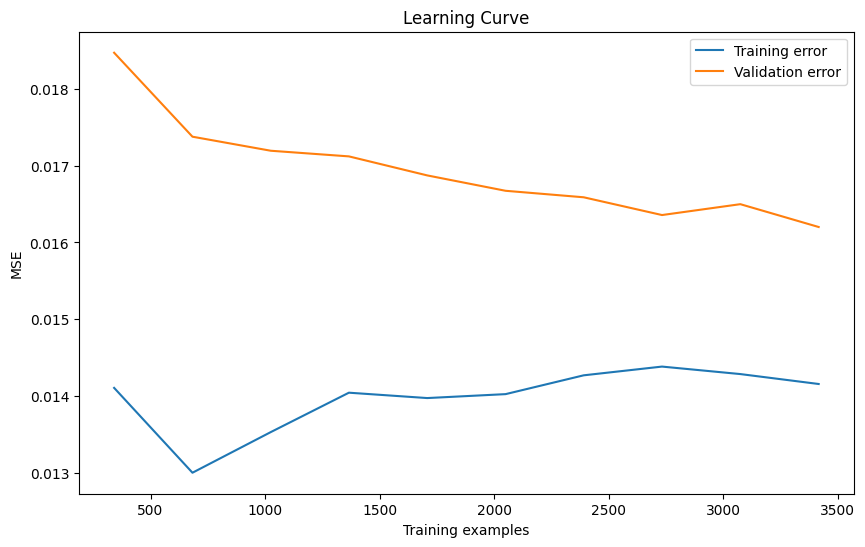

Tamaños de conjunto de entrenamiento: [ 341  683 1025 1366 1708 2050 2391 2733 3075 3417]
Errores de entrenamiento: [0.01410804 0.01300455 0.01353314 0.01404536 0.01397556 0.01402664
 0.01427135 0.01438496 0.01428754 0.01415843]
Errores de validación cruzada: [0.01846698 0.01737484 0.01719213 0.01711878 0.01687129 0.01667134
 0.01658685 0.01635585 0.01649721 0.0162002 ]


In [58]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()


    print("Tamaños de conjunto de entrenamiento:", train_sizes)
    print("Errores de entrenamiento:", train_scores_mean)
    print("Errores de validación cruzada:", test_scores_mean)


tree_model = DecisionTreeRegressor(min_samples_split=min_samples_split_value,
                                   min_samples_leaf=min_samples_leaf_value)


tree_model.fit(X_train, y_train)


plot_learning_curve(tree_model, X_train, y_train)



----
## 9.4 Ploteamos el arbol
----

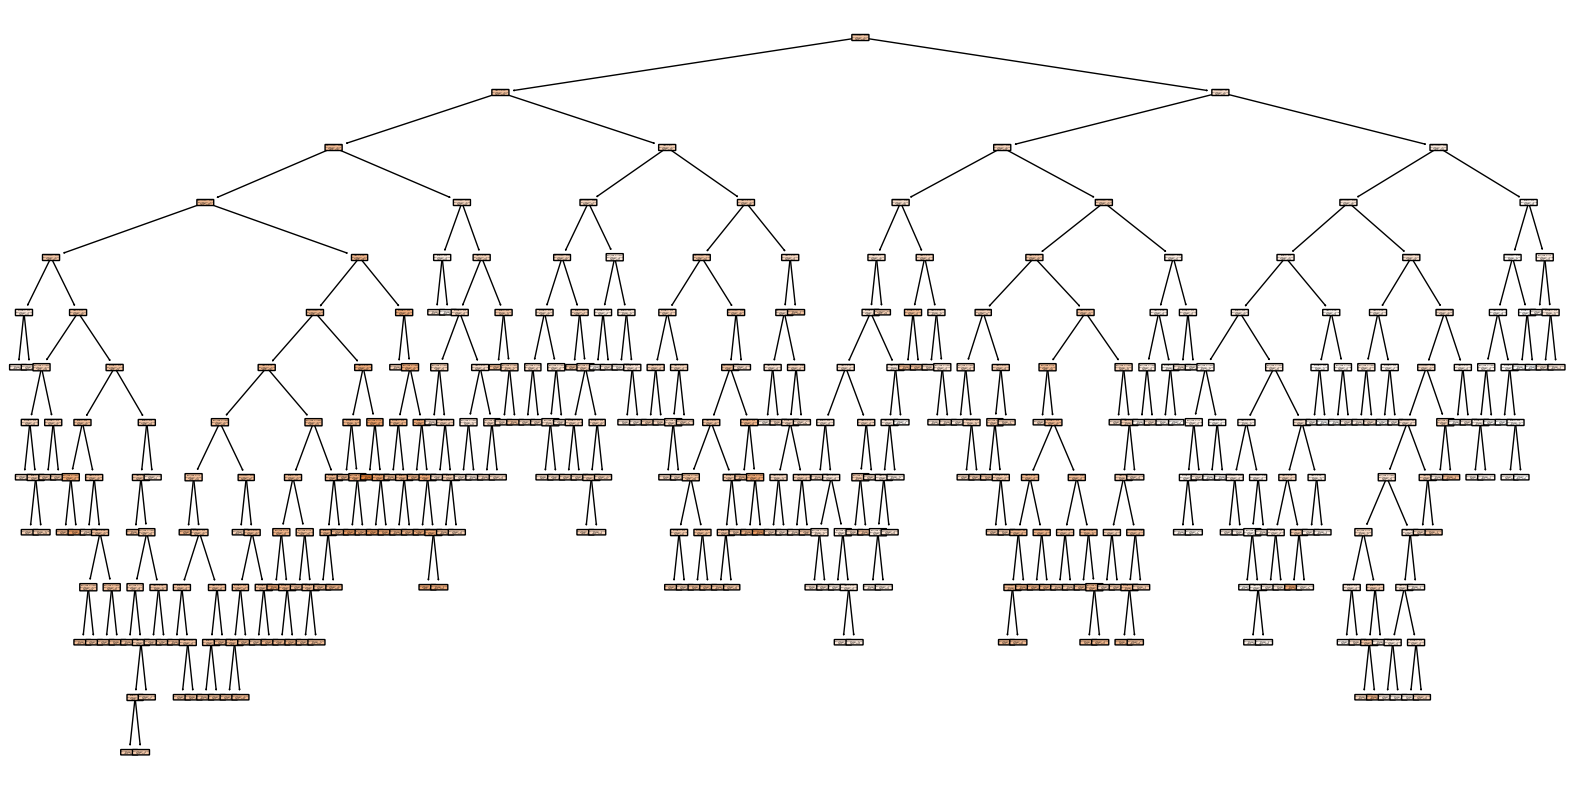

In [59]:
# Aqui lo que hacmos es convertir el índice en una lista de nombres de características
feature_names = X_train.columns.tolist()
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según tu preferencia
plot_tree(tree_model, feature_names=feature_names, filled=True, rounded=True)
plt.show()


----
----
----
----
# PASO 10: GUARDAMOS EL MODELO
----
----
----
----

In [60]:
ruta_modelo = r'G:\Mi unidad\1 DS\1 Archivos py\5 CURSOS\05 CodesHouse DS 1\MODEL\modelo_arbol_decision.joblib'

dump(tree_model, ruta_modelo)

print("Modelo guardado exitosamente en:", ruta_modelo)


Modelo guardado exitosamente en: G:\Mi unidad\1 DS\1 Archivos py\5 CURSOS\05 CodesHouse DS 1\MODEL\modelo_arbol_decision.joblib


----
----
----
----
# PASO 11: CONCLUSION FINAL
----
----
----
----

## CONCLUSIONES
----
## 1º CONCLUSION: MODELO
----
### 1º Porque un arbol de decisión:
* Se ha decidido hacer un arbol de decisión, atendiendo a que si realizabamos un modelo mas simple, la efectividad del modelo era mucho menor
* Se probó otros modelos, pero la carencia de datos (son practicamente 5000 filas), generaban gran cantidad de imprecisión.
### 2º Porque MSE sin hiperparametros:
* Curiosamente este resultado de MSE es mejor que el brindado por la hiperparametrización (se debe a la suerte de probar de forma manual)
* El resultado con HParametros es: 0.0143483279682753 
* El resulttado sin HP: 0.014303792199996416
* El factor suerte (se forma aleatoria se prueba dichos parametros y funcionan mejor)
    * 8: Número mínimo de muestras requeridas para dividir un nodo
    * 5:Número mínimo de muestras requeridas en una hoja

* Esto parecia indicar un posible sobreajuste pero los datos no parecen decir lo mismo:

    1. Tamaños de conjunto de entrenamiento:
        * Es el conjunto de entrenamiento utilizado para entrenar el modelo en cada iteración y comienza con 341 muestras y aumenta gradualmente hasta 3417 muestras en incrementos proporcionales.
     2. Errores de entrenamiento: 
        * El (MSE):Tenemos un error cuadrático medio más bajo indica un mejor ajuste del modelo a los datos de entrenamiento.
        * En este caso, el error disminuye inicialmente a medida que aumenta el tamaño del conjunto de entrenamiento, pero parece estabilizarse alrededor de 0.015.

    3. Errores de validación cruzada: 
        * Estos son los errores cuadráticos medios obtenidos en el conjunto de validación cruzada para cada tamaño de conjunto de entrenamiento. 
        * Volvemos a tener un error cuadrático medio más bajo indica un mejor rendimiento del modelo en datos no vistos.
        * También parece estabilizarse alrededor de cigras similaress después de aumentar inicialmente.

    4. Resultados: 
        * Esto sugiere que el modelo puede estar generalizando bien porque que los errores en el conjunto de validación cruzada no difieren significativamente de los errores en el conjunto de entrenamiento, y ambos errores se estabilizan a medida que aumenta el tamaño del conjunto de entrenamiento.
        * Ademas, se observa de forma clara en la gráfica

----
## 2º CONCLUSION: DECISIONES TOMADAS DURANTE EL DESARROLLO DEL PROYECTO

1. Importación de librerias
    * Se acumulan todas las librerias que se usan en el modelo
2. Se muestra el DF
3. Exploracion y limpieza de datos:
    * Diversas categoricas (aqui es necesario seleccionar cuales son mas utiles)
    * No hay nulos
    * Se eliminan duplicados (Me quedo con casi la mitad de los datos)
4: Analisis univariado:
    * Histogramas para las categoricas (y un grafico de tarta)
    * Tambien es visual poder por histograma como se distribuyen las numericas
4.1: Reducimos la dimensionalidad de los datos categoricos
    * Es fundamental para simplificar el analisis y futuro entrenamiento del modelo
5. Analisis multivariable
    * Numerico-numerico
    * Categoricas con la target
        * Tanto se grafica media como mutigraficos: (Muy visual)
        * Grafico de bigotes junto a un grafico de puntos 
        * Analisis Multivariante: 
        * Analisis de correlación (mediante factorización del modelo)
6. Ingenieria de caracteristicas
    * Analisis de outliers
        * La unica columna con outliers es la target, asi que se prueba a eliminar UNICAMENTE los valores "poco reales"
        * Porque lo ideal es que a la target no se le elimine los outliers.
    * Valores faltantes:
            * No hay
    * Nuevas caracteristicas:  
        * No parece necesario
    * Seleccion de caracteristicas: 
        * Nuestro modelo tiene muy pocas caracteristicas (7)
        * Al ser tan pocas, no parece necesario seleccionarlas, ya que tampoco afectará en demasia a la precisión del modelo
7. Escalado de valores 
    * Se hace un minmax escaler
8. Se divide el conjunto de datos
9. Modelaje
    * Se hace elmodelo
    * Se hiperparametriza para encontrar parametros que lo mejoren (parece dar peor)
        * Esto podria indicar overfitting (Pero se comprueba por metricas que el modelo da un resultado aceptable)
        * Tambien se plotea la linea de aprendizaje y parece que todo funciona
        * Se visualiza el arbol
10. Guardado del modelo

----



----
----
----
----
# PASO 12: SE DEJAN ALGUNAS PRACTICAS DONDE EL MSE ES MENOR
----
----
----
----

In [61]:


# Definir los hiperparámetros para controlar la complejidad del modelo
max_depth_value = 5  # Profundidad máxima del árbol
min_samples_split_value = 10  # Número mínimo de muestras requeridas para dividir un nodo
min_samples_leaf_value = 5  # Número mínimo de muestras requeridas en una hoja

# Crear el modelo de árbol de decisión con los hiperparámetros especificados
tree_model = DecisionTreeRegressor(max_depth=max_depth_value,
                                   min_samples_split=min_samples_split_value,
                                   min_samples_leaf=min_samples_leaf_value)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)


Error cuadrático medio (MSE) en el conjunto de prueba: 0.014785525403068933


In [62]:
# Obtener los hiperparámetros del modelo
hyperparameters = tree_model.get_params()

# Imprimir los hiperparámetros
print("Hiperparámetros del modelo:")
for param_name, param_value in hyperparameters.items():
    print(f"{param_name}: {param_value}")


Hiperparámetros del modelo:
ccp_alpha: 0.0
criterion: squared_error
max_depth: 5
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 10
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best


Error cuadrático medio (MSE) en el conjunto de prueba (Árbol de decisión): 0.01537819905486734


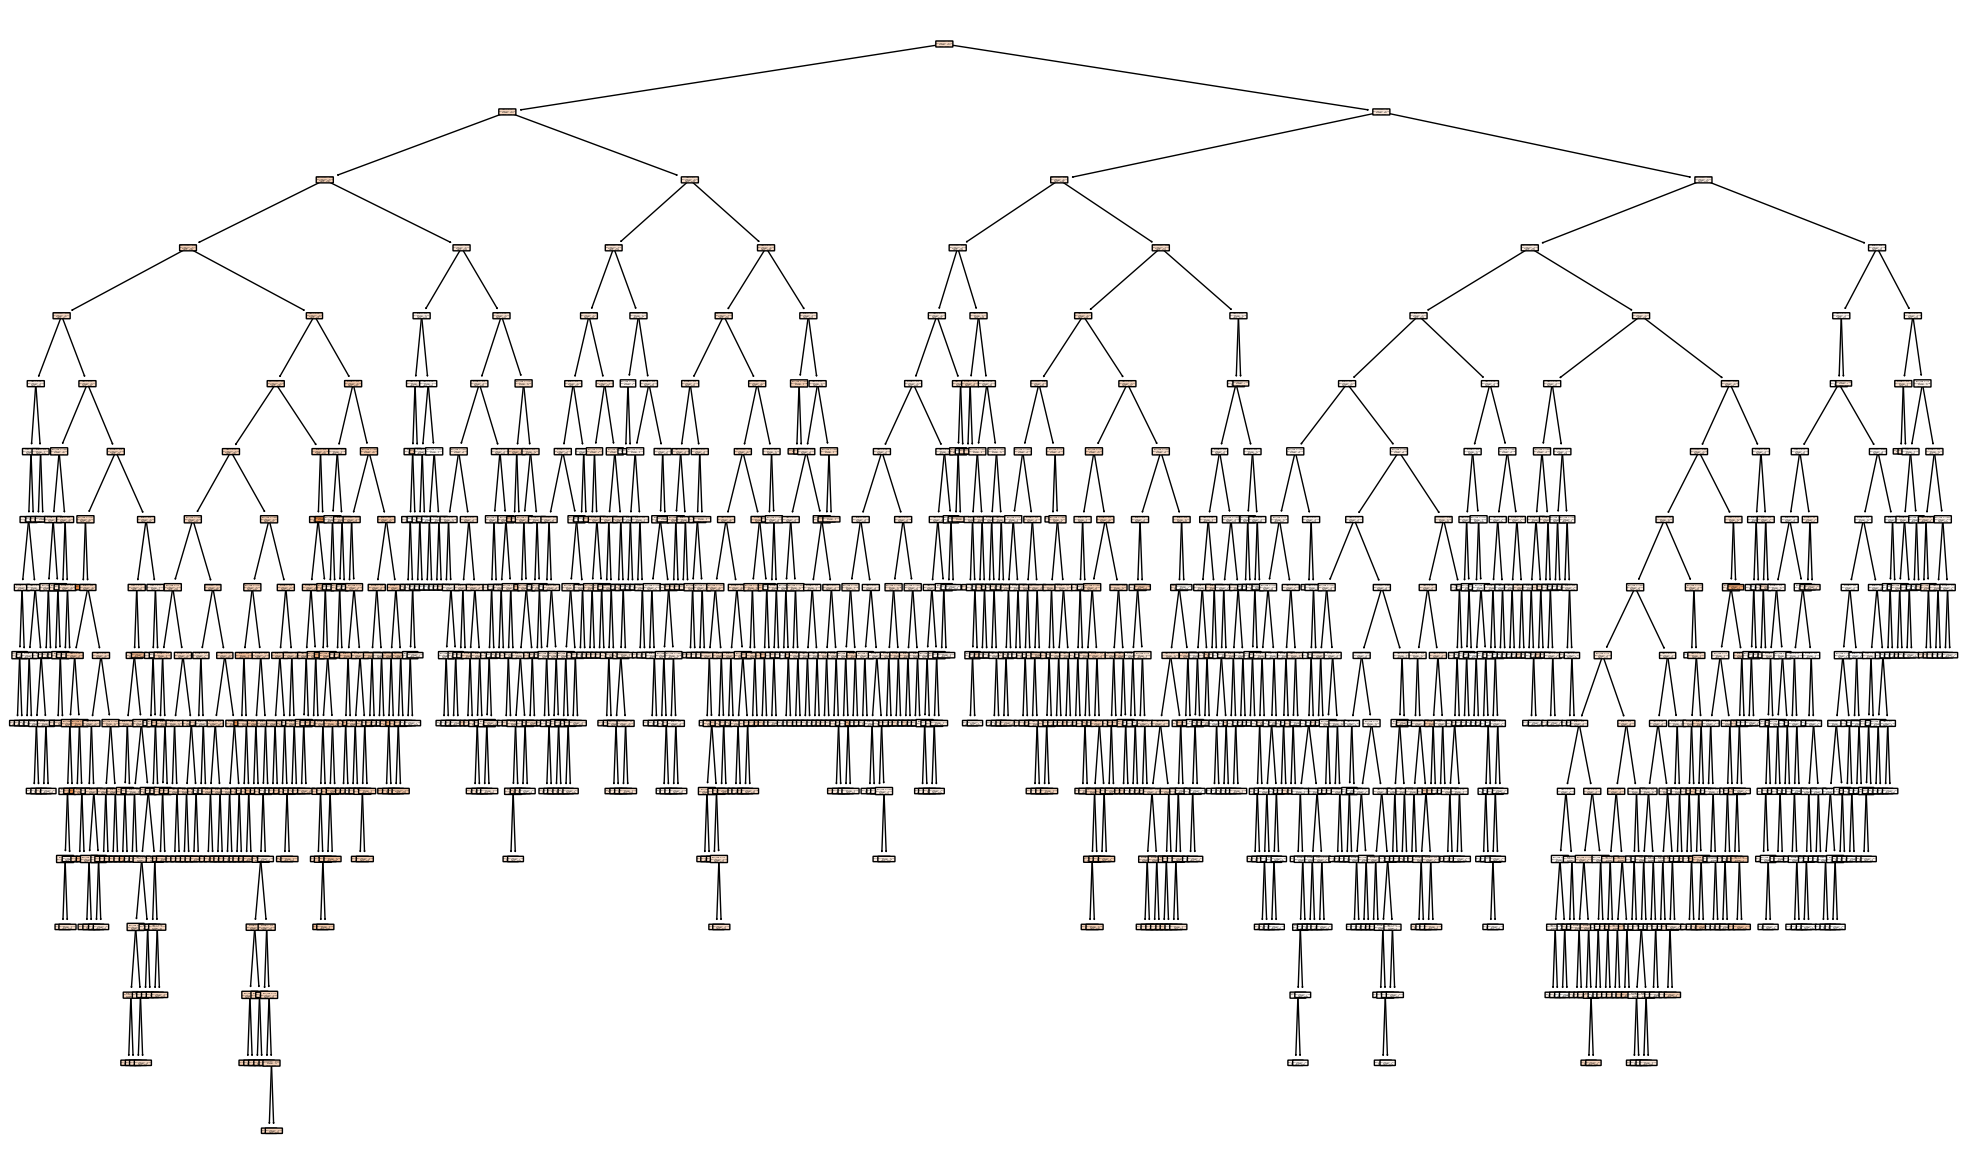

In [63]:


tree_model = DecisionTreeRegressor()
"""
tree_model = DecisionTreeRegressor(max_depth=5)  # Limita la profundidad a 3 niveles
tree_model = DecisionTreeRegressor(min_samples_split=10)  # Requiere al menos 10 muestras para dividir un nodo
tree_model = DecisionTreeRegressor(min_samples_leaf=5)  # Requiere al menos 5 muestras en cada hoja

"""
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Error cuadrático medio (MSE) en el conjunto de prueba (Árbol de decisión):", mse_tree)


plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()


----
## 9.2 Hiperparametrizacion
----

In [64]:


# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 1,2,3,4,5,6,7,8,9, 10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9, 10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9, 10]
}

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

# Inicializar GridSearchCV con el modelo, los hiperparámetros y la cantidad de validación cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener el mejor modelo entrenado
best_tree_model = grid_search.best_estimator_

# Predecir los valores de salario en el conjunto de prueba con el mejor modelo
y_pred_best_tree = best_tree_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba con el mejor modelo
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
print("Error cuadrático medio (MSE) en el conjunto de prueba (Árbol de decisión con mejores hiperparámetros):", mse_best_tree)
n_nodes = best_tree_model.tree_.node_count
n_leaves = best_tree_model.get_n_leaves()

print("Cantidad de nodos en el árbol:", n_nodes)
print("Cantidad de hojas en el árbol:", n_leaves)


Mejores hiperparámetros encontrados: {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 7}
Error cuadrático medio (MSE) en el conjunto de prueba (Árbol de decisión con mejores hiperparámetros): 0.014348327968275296
Cantidad de nodos en el árbol: 159
Cantidad de hojas en el árbol: 80


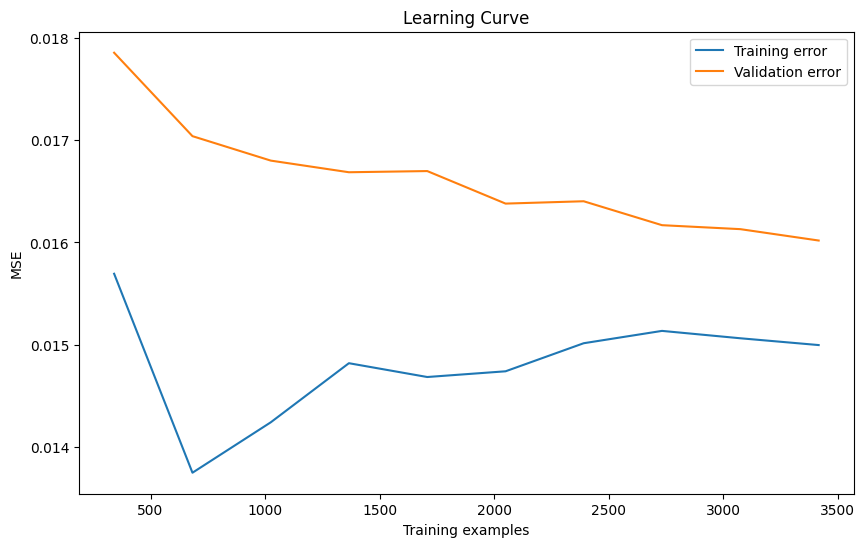

Tamaños de conjunto de entrenamiento: [ 341  683 1025 1366 1708 2050 2391 2733 3075 3417]
Errores de entrenamiento: [0.01569338 0.01374632 0.01423987 0.014818   0.01468286 0.01473885
 0.01501343 0.01513422 0.01506197 0.01499549]
Errores de validación cruzada: [0.01785622 0.01703983 0.01680047 0.01668661 0.0166982  0.01637986
 0.01640277 0.01616863 0.01612978 0.01601847]


In [65]:


# Crear el modelo de árbol de decisión con los mejores hiperparámetros encontrados
best_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                        min_samples_split=best_params['min_samples_split'],
                                        min_samples_leaf=best_params['min_samples_leaf'])

# Entrenar el mejor modelo con los datos de entrenamiento
best_tree_model.fit(X_train, y_train)

# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
    print("Tamaños de conjunto de entrenamiento:", train_sizes)
    print("Errores de entrenamiento:", train_scores_mean)
    print("Errores de validación cruzada:", test_scores_mean)

# Graficar la curva de aprendizaje
plot_learning_curve(best_tree_model, X_train, y_train)

